![1](../images/image_2.png)


In [33]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [34]:
def one_hot_embedding(labels, num_classes):
    y = torch.eye(num_classes)
    return y[labels]

In [35]:
def softmax_to_one_hot(tensor):
    max_idx = torch.argmax(tensor, 1, keepdim=True)
    if tensor.is_cuda:
        one_hot = torch.zeros(tensor.shape).cuda()
    else:
        one_hot = torch.zeros(tensor.shape)
    
    one_hot.scatter_(1, max_idx, 1)
    return one_hot
    

In [36]:
def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)


In [38]:
class TwoLayerNet_pytorch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size) -> None:
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.network1 = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.Sigmoid(), 
            nn.Linear(self.hidden_size, self.output_size),
            nn.Softmax()
        )
        
    def forward(self, x):
        y = self.network1(x)
        return y


In [40]:
epochs = 5
learning_rate = 0.01
batch_size = 100
loss_function = nn.BCELoss()

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True
    
)


In [41]:
net = TwoLayerNet_pytorch(input_size=784, hidden_size=50, output_size=10)
net.apply(weight_init)

optimizer = optim.SGD(net.parameters(), lr=learning_rate)

train_loss_list = []
net.train()

for epoch in range(epochs):
    for i, (X, t) in enumerate(train_loader):
        X = X.view(-1, 784)
        t = one_hot_embedding(t, 10)
        
        Y = net(X)
        loss = loss_function(Y, t)
        
        train_loss_list.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"[{i}/{len(train_loader)}][{epoch}/{epochs}] loss: {loss}")        

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0/600][0/5] loss: 0.6470882892608643
[1/600][0/5] loss: 0.6662348508834839
[2/600][0/5] loss: 0.645346999168396
[3/600][0/5] loss: 0.6275954246520996
[4/600][0/5] loss: 0.603707492351532
[5/600][0/5] loss: 0.6149023175239563


[6/600][0/5] loss: 0.5720287561416626
[7/600][0/5] loss: 0.5750568509101868
[8/600][0/5] loss: 0.5757676959037781


[9/600][0/5] loss: 0.5626718997955322
[10/600][0/5] loss: 0.5499889254570007
[11/600][0/5] loss: 0.6160014867782593
[12/600][0/5] loss: 0.5237201452255249
[13/600][0/5] loss: 0.5255762338638306


[14/600][0/5] loss: 0.5186222195625305
[15/600][0/5] loss: 0.5459818243980408
[16/600][0/5] loss: 0.5108761191368103
[17/600][0/5] loss: 0.48812156915664673
[18/600][0/5] loss: 0.4888100326061249
[19/600][0/5] loss: 0.4992549419403076


[20/600][0/5] loss: 0.5227132439613342
[21/600][0/5] loss: 0.4794059097766876
[22/600][0/5] loss: 0.4636845886707306
[23/600][0/5] loss: 0.46465522050857544
[24/600][0/5] loss: 0.46063515543937683
[25/600][0/5] loss: 0.45602288842201233
[26/600][0/5] loss: 0.44940313696861267


[27/600][0/5] loss: 0.47072866559028625
[28/600][0/5] loss: 0.43809694051742554
[29/600][0/5] loss: 0.4553534984588623
[30/600][0/5] loss: 0.4650806188583374
[31/600][0/5] loss: 0.4298805892467499
[32/600][0/5] loss: 0.4605686068534851


[33/600][0/5] loss: 0.4513833224773407
[34/600][0/5] loss: 0.461793452501297
[35/600][0/5] loss: 0.45928189158439636
[36/600][0/5] loss: 0.4842211902141571
[37/600][0/5] loss: 0.431707501411438


[38/600][0/5] loss: 0.4294968545436859
[39/600][0/5] loss: 0.46261003613471985
[40/600][0/5] loss: 0.45778709650039673
[41/600][0/5] loss: 0.4316505789756775


[42/600][0/5] loss: 0.4116341769695282
[43/600][0/5] loss: 0.43884074687957764
[44/600][0/5] loss: 0.4291302561759949
[45/600][0/5] loss: 0.4239085912704468
[46/600][0/5] loss: 0.4516732692718506


[47/600][0/5] loss: 0.4530487060546875
[48/600][0/5] loss: 0.4185728430747986
[49/600][0/5] loss: 0.4085763990879059
[50/600][0/5] loss: 0.4140741229057312
[51/600][0/5] loss: 0.4207777678966522
[52/600][0/5] loss: 0.383431613445282
[53/600][0/5] loss: 0.4039016664028168
[54/600][0/5] loss: 0.4201646149158478
[55/600][0/5] loss: 0.38622406125068665
[56/600][0/5] loss: 0.43924573063850403
[57/600][0/5] loss: 0.44547078013420105
[58/600][0/5] loss: 0.43309667706489563


[59/600][0/5] loss: 0.43575990200042725
[60/600][0/5] loss: 0.43202999234199524
[61/600][0/5] loss: 0.40963250398635864
[62/600][0/5] loss: 0.4226738512516022
[63/600][0/5] loss: 0.4417228400707245
[64/600][0/5] loss: 0.4035254418849945
[65/600][0/5] loss: 0.432582825422287


[66/600][0/5] loss: 0.42175111174583435
[67/600][0/5] loss: 0.36771294474601746
[68/600][0/5] loss: 0.43177446722984314
[69/600][0/5] loss: 0.42262017726898193
[70/600][0/5] loss: 0.4069612920284271
[71/600][0/5] loss: 0.4066532254219055
[72/600][0/5] loss: 0.4102848470211029
[73/600][0/5] loss: 0.3712209463119507


[74/600][0/5] loss: 0.3913474977016449
[75/600][0/5] loss: 0.4070391356945038
[76/600][0/5] loss: 0.4194498658180237
[77/600][0/5] loss: 0.40436288714408875
[78/600][0/5] loss: 0.3898294270038605
[79/600][0/5] loss: 0.39411577582359314
[80/600][0/5] loss: 0.4015558362007141


[81/600][0/5] loss: 0.4141094982624054
[82/600][0/5] loss: 0.3957710564136505
[83/600][0/5] loss: 0.4001631736755371
[84/600][0/5] loss: 0.3926698565483093
[85/600][0/5] loss: 0.408888041973114
[86/600][0/5] loss: 0.41727709770202637
[87/600][0/5] loss: 0.37978819012641907
[88/600][0/5] loss: 0.3879993259906769


[89/600][0/5] loss: 0.3837732672691345
[90/600][0/5] loss: 0.4017646908760071
[91/600][0/5] loss: 0.3850504159927368
[92/600][0/5] loss: 0.4006621539592743
[93/600][0/5] loss: 0.39155900478363037
[94/600][0/5] loss: 0.3906790018081665
[95/600][0/5] loss: 0.4120786786079407
[96/600][0/5] loss: 0.38213932514190674
[97/600][0/5] loss: 0.39888590574264526


[98/600][0/5] loss: 0.407998263835907
[99/600][0/5] loss: 0.4155718684196472
[100/600][0/5] loss: 0.38985854387283325
[101/600][0/5] loss: 0.3779776692390442
[102/600][0/5] loss: 0.3994227349758148
[103/600][0/5] loss: 0.39207419753074646
[104/600][0/5] loss: 0.3818022608757019
[105/600][0/5] loss: 0.38535505533218384
[106/600][0/5] loss: 0.37333887815475464


[107/600][0/5] loss: 0.3757596015930176
[108/600][0/5] loss: 0.4025511145591736
[109/600][0/5] loss: 0.40056824684143066
[110/600][0/5] loss: 0.36335715651512146
[111/600][0/5] loss: 0.3883417248725891
[112/600][0/5] loss: 0.4011423587799072
[113/600][0/5] loss: 0.3720550537109375
[114/600][0/5] loss: 0.3680935800075531
[115/600][0/5] loss: 0.39734137058258057
[116/600][0/5] loss: 0.4141332507133484
[117/600][0/5] loss: 0.3784949481487274


[118/600][0/5] loss: 0.3817925453186035
[119/600][0/5] loss: 0.3815641701221466
[120/600][0/5] loss: 0.39359012246131897
[121/600][0/5] loss: 0.3907061517238617
[122/600][0/5] loss: 0.3809675872325897
[123/600][0/5] loss: 0.37244319915771484
[124/600][0/5] loss: 0.37921035289764404
[125/600][0/5] loss: 0.37317290902137756
[126/600][0/5] loss: 0.37919318675994873
[127/600][0/5] loss: 0.40022382140159607
[128/600][0/5] loss: 0.3759858310222626
[129/600][0/5] loss: 0.39767441153526306


[130/600][0/5] loss: 0.3614286184310913
[131/600][0/5] loss: 0.3787411153316498
[132/600][0/5] loss: 0.3700020909309387
[133/600][0/5] loss: 0.3515729606151581
[134/600][0/5] loss: 0.3710939884185791
[135/600][0/5] loss: 0.3744150996208191
[136/600][0/5] loss: 0.38375723361968994
[137/600][0/5] loss: 0.36359626054763794
[138/600][0/5] loss: 0.3835897445678711
[139/600][0/5] loss: 0.38480621576309204
[140/600][0/5] loss: 0.3845825493335724


[141/600][0/5] loss: 0.3522353172302246
[142/600][0/5] loss: 0.36104699969291687
[143/600][0/5] loss: 0.3776673674583435
[144/600][0/5] loss: 0.3569314479827881
[145/600][0/5] loss: 0.3844913840293884
[146/600][0/5] loss: 0.369383305311203
[147/600][0/5] loss: 0.3850077688694
[148/600][0/5] loss: 0.3753913640975952
[149/600][0/5] loss: 0.3732926547527313


[150/600][0/5] loss: 0.35654371976852417
[151/600][0/5] loss: 0.3754640817642212
[152/600][0/5] loss: 0.37269124388694763
[153/600][0/5] loss: 0.3524644374847412
[154/600][0/5] loss: 0.3718670904636383
[155/600][0/5] loss: 0.35042789578437805
[156/600][0/5] loss: 0.3681987226009369
[157/600][0/5] loss: 0.3409014344215393
[158/600][0/5] loss: 0.369550496339798


[159/600][0/5] loss: 0.3626459538936615
[160/600][0/5] loss: 0.36278483271598816
[161/600][0/5] loss: 0.3611934781074524
[162/600][0/5] loss: 0.351043701171875
[163/600][0/5] loss: 0.37779533863067627
[164/600][0/5] loss: 0.3631628453731537
[165/600][0/5] loss: 0.348811537027359
[166/600][0/5] loss: 0.3620239794254303
[167/600][0/5] loss: 0.3713746964931488


[168/600][0/5] loss: 0.37773892283439636
[169/600][0/5] loss: 0.3592298924922943
[170/600][0/5] loss: 0.3606730103492737
[171/600][0/5] loss: 0.3472613990306854
[172/600][0/5] loss: 0.37426450848579407
[173/600][0/5] loss: 0.3800511658191681
[174/600][0/5] loss: 0.34711796045303345
[175/600][0/5] loss: 0.37681034207344055
[176/600][0/5] loss: 0.3649459481239319
[177/600][0/5] loss: 0.37855255603790283


[178/600][0/5] loss: 0.3650747239589691
[179/600][0/5] loss: 0.37552183866500854
[180/600][0/5] loss: 0.3693985342979431
[181/600][0/5] loss: 0.3439358174800873
[182/600][0/5] loss: 0.3580656945705414
[183/600][0/5] loss: 0.3650919795036316
[184/600][0/5] loss: 0.37170305848121643
[185/600][0/5] loss: 0.3532325327396393
[186/600][0/5] loss: 0.3807348310947418


[187/600][0/5] loss: 0.35820212960243225
[188/600][0/5] loss: 0.3740815818309784
[189/600][0/5] loss: 0.3356141149997711
[190/600][0/5] loss: 0.35889166593551636
[191/600][0/5] loss: 0.3750770390033722
[192/600][0/5] loss: 0.36300286650657654
[193/600][0/5] loss: 0.34937867522239685
[194/600][0/5] loss: 0.36328381299972534


[195/600][0/5] loss: 0.34834134578704834
[196/600][0/5] loss: 0.3707883059978485
[197/600][0/5] loss: 0.358182430267334
[198/600][0/5] loss: 0.3577686846256256
[199/600][0/5] loss: 0.35521629452705383
[200/600][0/5] loss: 0.36140742897987366
[201/600][0/5] loss: 0.3686394691467285
[202/600][0/5] loss: 0.35685741901397705
[203/600][0/5] loss: 0.35702019929885864
[204/600][0/5] loss: 0.3662816882133484
[205/600][0/5] loss: 0.3643510639667511


[206/600][0/5] loss: 0.35421285033226013
[207/600][0/5] loss: 0.36013907194137573
[208/600][0/5] loss: 0.3658411502838135
[209/600][0/5] loss: 0.3632121682167053
[210/600][0/5] loss: 0.36285826563835144
[211/600][0/5] loss: 0.3485901653766632
[212/600][0/5] loss: 0.3580474853515625
[213/600][0/5] loss: 0.35517045855522156
[214/600][0/5] loss: 0.3470492362976074
[215/600][0/5] loss: 0.3549453318119049
[216/600][0/5] loss: 0.3545973002910614
[217/600][0/5] loss: 0.3486604690551758
[218/600][0/5] loss: 0.3567890524864197
[219/600][0/5] loss: 0.3522075414657593


[220/600][0/5] loss: 0.35635659098625183
[221/600][0/5] loss: 0.33856669068336487
[222/600][0/5] loss: 0.3523261845111847
[223/600][0/5] loss: 0.3518247604370117
[224/600][0/5] loss: 0.35745471715927124
[225/600][0/5] loss: 0.34689778089523315
[226/600][0/5] loss: 0.35990071296691895
[227/600][0/5] loss: 0.3452567458152771
[228/600][0/5] loss: 0.3516783118247986


[229/600][0/5] loss: 0.3507385551929474
[230/600][0/5] loss: 0.3510514497756958
[231/600][0/5] loss: 0.3494625687599182
[232/600][0/5] loss: 0.34263771772384644
[233/600][0/5] loss: 0.3462263345718384
[234/600][0/5] loss: 0.3687248229980469
[235/600][0/5] loss: 0.3529190123081207
[236/600][0/5] loss: 0.3615749776363373
[237/600][0/5] loss: 0.351887971162796


[238/600][0/5] loss: 0.353863000869751
[239/600][0/5] loss: 0.3428565263748169
[240/600][0/5] loss: 0.3405885696411133
[241/600][0/5] loss: 0.34868186712265015
[242/600][0/5] loss: 0.33856505155563354
[243/600][0/5] loss: 0.36141228675842285
[244/600][0/5] loss: 0.3513413369655609
[245/600][0/5] loss: 0.3452179431915283
[246/600][0/5] loss: 0.3339661955833435
[247/600][0/5] loss: 0.36107757687568665


[248/600][0/5] loss: 0.3723984956741333
[249/600][0/5] loss: 0.3463067412376404
[250/600][0/5] loss: 0.33749479055404663
[251/600][0/5] loss: 0.341404527425766
[252/600][0/5] loss: 0.34028130769729614
[253/600][0/5] loss: 0.331693559885025
[254/600][0/5] loss: 0.33857637643814087


[255/600][0/5] loss: 0.34876400232315063
[256/600][0/5] loss: 0.3387812674045563
[257/600][0/5] loss: 0.3497427701950073
[258/600][0/5] loss: 0.3504696190357208
[259/600][0/5] loss: 0.3328738510608673
[260/600][0/5] loss: 0.33982929587364197
[261/600][0/5] loss: 0.340511679649353
[262/600][0/5] loss: 0.33993831276893616
[263/600][0/5] loss: 0.3562890887260437
[264/600][0/5] loss: 0.3447491526603699
[265/600][0/5] loss: 0.34336623549461365


[266/600][0/5] loss: 0.3549446165561676
[267/600][0/5] loss: 0.34017226099967957
[268/600][0/5] loss: 0.3470182716846466
[269/600][0/5] loss: 0.33765506744384766
[270/600][0/5] loss: 0.34838610887527466
[271/600][0/5] loss: 0.34101611375808716
[272/600][0/5] loss: 0.35427430272102356
[273/600][0/5] loss: 0.35904547572135925
[274/600][0/5] loss: 0.3341057598590851
[275/600][0/5] loss: 0.3542158603668213
[276/600][0/5] loss: 0.3452882468700409
[277/600][0/5] loss: 0.34349724650382996
[278/600][0/5] loss: 0.3462153375148773


[279/600][0/5] loss: 0.34250378608703613
[280/600][0/5] loss: 0.3449426591396332
[281/600][0/5] loss: 0.34395378828048706
[282/600][0/5] loss: 0.3391704857349396
[283/600][0/5] loss: 0.3505404591560364
[284/600][0/5] loss: 0.33910462260246277
[285/600][0/5] loss: 0.34083297848701477
[286/600][0/5] loss: 0.3361399173736572
[287/600][0/5] loss: 0.34476742148399353
[288/600][0/5] loss: 0.35456445813179016
[289/600][0/5] loss: 0.34874263405799866
[290/600][0/5] loss: 0.3324810564517975


[291/600][0/5] loss: 0.3377757966518402
[292/600][0/5] loss: 0.3496333658695221
[293/600][0/5] loss: 0.3414597511291504
[294/600][0/5] loss: 0.33307892084121704
[295/600][0/5] loss: 0.34200552105903625
[296/600][0/5] loss: 0.354577898979187
[297/600][0/5] loss: 0.3417403995990753
[298/600][0/5] loss: 0.3444759249687195
[299/600][0/5] loss: 0.34704241156578064
[300/600][0/5] loss: 0.34552493691444397
[301/600][0/5] loss: 0.3503761887550354
[302/600][0/5] loss: 0.3485645055770874


[303/600][0/5] loss: 0.35045555233955383
[304/600][0/5] loss: 0.3383945822715759
[305/600][0/5] loss: 0.33771663904190063
[306/600][0/5] loss: 0.3460267186164856
[307/600][0/5] loss: 0.3409644365310669
[308/600][0/5] loss: 0.3296681344509125
[309/600][0/5] loss: 0.3409712612628937
[310/600][0/5] loss: 0.3326924443244934
[311/600][0/5] loss: 0.3441528379917145
[312/600][0/5] loss: 0.33640044927597046
[313/600][0/5] loss: 0.3482609689235687


[314/600][0/5] loss: 0.3313700258731842
[315/600][0/5] loss: 0.3320090174674988
[316/600][0/5] loss: 0.3279658854007721
[317/600][0/5] loss: 0.3456304669380188
[318/600][0/5] loss: 0.33986350893974304
[319/600][0/5] loss: 0.33528056740760803
[320/600][0/5] loss: 0.3375488817691803
[321/600][0/5] loss: 0.33686232566833496
[322/600][0/5] loss: 0.34132787585258484


[323/600][0/5] loss: 0.3393186330795288
[324/600][0/5] loss: 0.34223097562789917
[325/600][0/5] loss: 0.33593612909317017
[326/600][0/5] loss: 0.3377198576927185
[327/600][0/5] loss: 0.3518781363964081
[328/600][0/5] loss: 0.335755318403244
[329/600][0/5] loss: 0.33784669637680054
[330/600][0/5] loss: 0.34200623631477356
[331/600][0/5] loss: 0.335921049118042
[332/600][0/5] loss: 0.34513452649116516


[333/600][0/5] loss: 0.34758612513542175
[334/600][0/5] loss: 0.33622607588768005
[335/600][0/5] loss: 0.3477114140987396
[336/600][0/5] loss: 0.3349825441837311
[337/600][0/5] loss: 0.3446824252605438
[338/600][0/5] loss: 0.34634238481521606
[339/600][0/5] loss: 0.33586201071739197
[340/600][0/5] loss: 0.34159207344055176


[341/600][0/5] loss: 0.33696869015693665
[342/600][0/5] loss: 0.3359777629375458
[343/600][0/5] loss: 0.340816855430603
[344/600][0/5] loss: 0.33829405903816223
[345/600][0/5] loss: 0.3385075032711029
[346/600][0/5] loss: 0.34581151604652405
[347/600][0/5] loss: 0.3250383138656616
[348/600][0/5] loss: 0.34054985642433167
[349/600][0/5] loss: 0.33260414004325867
[350/600][0/5] loss: 0.33733102679252625
[351/600][0/5] loss: 0.33930230140686035


[352/600][0/5] loss: 0.34055033326148987
[353/600][0/5] loss: 0.3386603593826294
[354/600][0/5] loss: 0.34123679995536804
[355/600][0/5] loss: 0.3502296507358551
[356/600][0/5] loss: 0.32923468947410583
[357/600][0/5] loss: 0.33681780099868774
[358/600][0/5] loss: 0.3421609103679657
[359/600][0/5] loss: 0.331898033618927
[360/600][0/5] loss: 0.3411882519721985


[361/600][0/5] loss: 0.3411358892917633
[362/600][0/5] loss: 0.3456946313381195
[363/600][0/5] loss: 0.33144453167915344
[364/600][0/5] loss: 0.3470743000507355
[365/600][0/5] loss: 0.3318307101726532
[366/600][0/5] loss: 0.3248700201511383
[367/600][0/5] loss: 0.3303055167198181
[368/600][0/5] loss: 0.3366950750350952
[369/600][0/5] loss: 0.32531407475471497
[370/600][0/5] loss: 0.3294053375720978
[371/600][0/5] loss: 0.3277992606163025


[372/600][0/5] loss: 0.3336822986602783
[373/600][0/5] loss: 0.3412950336933136
[374/600][0/5] loss: 0.341522216796875
[375/600][0/5] loss: 0.3291207253932953
[376/600][0/5] loss: 0.33117619156837463
[377/600][0/5] loss: 0.3291212022304535
[378/600][0/5] loss: 0.3321351110935211
[379/600][0/5] loss: 0.3401401937007904
[380/600][0/5] loss: 0.3322511315345764
[381/600][0/5] loss: 0.338110089302063


[382/600][0/5] loss: 0.3460681140422821
[383/600][0/5] loss: 0.33414793014526367
[384/600][0/5] loss: 0.3319433629512787
[385/600][0/5] loss: 0.33081427216529846
[386/600][0/5] loss: 0.33043044805526733
[387/600][0/5] loss: 0.32395488023757935
[388/600][0/5] loss: 0.3366050124168396
[389/600][0/5] loss: 0.3354266881942749
[390/600][0/5] loss: 0.33681970834732056
[391/600][0/5] loss: 0.3313213288784027
[392/600][0/5] loss: 0.33387893438339233
[393/600][0/5] loss: 0.33202075958251953


[394/600][0/5] loss: 0.3352962136268616
[395/600][0/5] loss: 0.3308072090148926
[396/600][0/5] loss: 0.329647421836853
[397/600][0/5] loss: 0.3295479118824005
[398/600][0/5] loss: 0.3344966471195221
[399/600][0/5] loss: 0.32863175868988037
[400/600][0/5] loss: 0.3320310413837433
[401/600][0/5] loss: 0.3372851610183716
[402/600][0/5] loss: 0.3319615125656128
[403/600][0/5] loss: 0.3369204103946686
[404/600][0/5] loss: 0.3383648693561554
[405/600][0/5] loss: 0.33762022852897644
[406/600][0/5] loss: 0.332398384809494
[407/600][0/5] loss: 0.3325546681880951
[408/600][0/5] loss: 0.329742968082428


[409/600][0/5] loss: 0.3331173360347748
[410/600][0/5] loss: 0.3320561945438385
[411/600][0/5] loss: 0.33465877175331116
[412/600][0/5] loss: 0.3288394510746002
[413/600][0/5] loss: 0.3348590135574341
[414/600][0/5] loss: 0.33101630210876465
[415/600][0/5] loss: 0.3326890170574188
[416/600][0/5] loss: 0.332820862531662
[417/600][0/5] loss: 0.32403403520584106
[418/600][0/5] loss: 0.32863521575927734


[419/600][0/5] loss: 0.33269864320755005
[420/600][0/5] loss: 0.33295783400535583
[421/600][0/5] loss: 0.33536142110824585
[422/600][0/5] loss: 0.3334501385688782
[423/600][0/5] loss: 0.33421891927719116
[424/600][0/5] loss: 0.3460882604122162
[425/600][0/5] loss: 0.3245401680469513
[426/600][0/5] loss: 0.3333801329135895
[427/600][0/5] loss: 0.3276523947715759


[428/600][0/5] loss: 0.33329907059669495
[429/600][0/5] loss: 0.3356453776359558
[430/600][0/5] loss: 0.33419764041900635
[431/600][0/5] loss: 0.32456937432289124
[432/600][0/5] loss: 0.32307636737823486
[433/600][0/5] loss: 0.33359861373901367
[434/600][0/5] loss: 0.323686420917511
[435/600][0/5] loss: 0.32869675755500793
[436/600][0/5] loss: 0.33233940601348877


[437/600][0/5] loss: 0.3290883004665375
[438/600][0/5] loss: 0.33131682872772217
[439/600][0/5] loss: 0.33720701932907104
[440/600][0/5] loss: 0.33034998178482056
[441/600][0/5] loss: 0.33237791061401367
[442/600][0/5] loss: 0.3351259231567383
[443/600][0/5] loss: 0.3297877907752991
[444/600][0/5] loss: 0.33379942178726196
[445/600][0/5] loss: 0.3286360204219818


[446/600][0/5] loss: 0.3257879316806793
[447/600][0/5] loss: 0.32366129755973816
[448/600][0/5] loss: 0.3295119106769562
[449/600][0/5] loss: 0.3353976607322693
[450/600][0/5] loss: 0.32291796803474426
[451/600][0/5] loss: 0.3265360891819
[452/600][0/5] loss: 0.3322450816631317
[453/600][0/5] loss: 0.327892005443573


[454/600][0/5] loss: 0.3357243239879608
[455/600][0/5] loss: 0.33117660880088806
[456/600][0/5] loss: 0.3254947364330292
[457/600][0/5] loss: 0.32633450627326965
[458/600][0/5] loss: 0.3325929045677185
[459/600][0/5] loss: 0.3379427492618561
[460/600][0/5] loss: 0.32829758524894714
[461/600][0/5] loss: 0.32161271572113037
[462/600][0/5] loss: 0.3270692527294159
[463/600][0/5] loss: 0.33006682991981506
[464/600][0/5] loss: 0.32703351974487305
[465/600][0/5] loss: 0.33087462186813354


[466/600][0/5] loss: 0.3297043442726135
[467/600][0/5] loss: 0.33359748125076294
[468/600][0/5] loss: 0.3334444463253021
[469/600][0/5] loss: 0.3372569680213928
[470/600][0/5] loss: 0.326913446187973
[471/600][0/5] loss: 0.3296298086643219
[472/600][0/5] loss: 0.3251986801624298
[473/600][0/5] loss: 0.3273807168006897
[474/600][0/5] loss: 0.32974672317504883
[475/600][0/5] loss: 0.324768602848053
[476/600][0/5] loss: 0.3292703628540039
[477/600][0/5] loss: 0.33194729685783386
[478/600][0/5] loss: 0.32957756519317627


[479/600][0/5] loss: 0.32816338539123535
[480/600][0/5] loss: 0.32919514179229736
[481/600][0/5] loss: 0.3284214735031128
[482/600][0/5] loss: 0.324007123708725
[483/600][0/5] loss: 0.3266810178756714
[484/600][0/5] loss: 0.3349370062351227
[485/600][0/5] loss: 0.3248663544654846
[486/600][0/5] loss: 0.3247905671596527
[487/600][0/5] loss: 0.3291769027709961
[488/600][0/5] loss: 0.3288320004940033
[489/600][0/5] loss: 0.3243124485015869
[490/600][0/5] loss: 0.33337751030921936


[491/600][0/5] loss: 0.32511183619499207
[492/600][0/5] loss: 0.32868853211402893
[493/600][0/5] loss: 0.32753682136535645
[494/600][0/5] loss: 0.3292735517024994
[495/600][0/5] loss: 0.32581737637519836
[496/600][0/5] loss: 0.3269565999507904
[497/600][0/5] loss: 0.3292248547077179
[498/600][0/5] loss: 0.329380601644516
[499/600][0/5] loss: 0.3296990394592285


[500/600][0/5] loss: 0.3315715491771698
[501/600][0/5] loss: 0.32877954840660095
[502/600][0/5] loss: 0.3248380124568939
[503/600][0/5] loss: 0.3231014907360077
[504/600][0/5] loss: 0.32811135053634644
[505/600][0/5] loss: 0.3250264525413513
[506/600][0/5] loss: 0.3343921899795532
[507/600][0/5] loss: 0.3310825526714325
[508/600][0/5] loss: 0.32674461603164673
[509/600][0/5] loss: 0.32662275433540344
[510/600][0/5] loss: 0.32465142011642456


[511/600][0/5] loss: 0.32394543290138245
[512/600][0/5] loss: 0.3293507397174835
[513/600][0/5] loss: 0.3287121057510376
[514/600][0/5] loss: 0.32490819692611694
[515/600][0/5] loss: 0.3273725211620331
[516/600][0/5] loss: 0.32925093173980713
[517/600][0/5] loss: 0.33895543217658997
[518/600][0/5] loss: 0.33097830414772034
[519/600][0/5] loss: 0.32781749963760376
[520/600][0/5] loss: 0.3274276852607727
[521/600][0/5] loss: 0.3314760625362396
[522/600][0/5] loss: 0.32408592104911804


[523/600][0/5] loss: 0.32238098978996277
[524/600][0/5] loss: 0.3292730748653412
[525/600][0/5] loss: 0.3323528468608856
[526/600][0/5] loss: 0.33096078038215637
[527/600][0/5] loss: 0.32615718245506287
[528/600][0/5] loss: 0.3260003328323364
[529/600][0/5] loss: 0.325361967086792
[530/600][0/5] loss: 0.332881361246109
[531/600][0/5] loss: 0.332844078540802
[532/600][0/5] loss: 0.32348453998565674
[533/600][0/5] loss: 0.32908061146736145


[534/600][0/5] loss: 0.3241727650165558
[535/600][0/5] loss: 0.32661545276641846
[536/600][0/5] loss: 0.32544416189193726
[537/600][0/5] loss: 0.3234427869319916
[538/600][0/5] loss: 0.3281329572200775
[539/600][0/5] loss: 0.32746821641921997
[540/600][0/5] loss: 0.3288162648677826
[541/600][0/5] loss: 0.32816869020462036
[542/600][0/5] loss: 0.32993417978286743
[543/600][0/5] loss: 0.3280770182609558


[544/600][0/5] loss: 0.32613927125930786
[545/600][0/5] loss: 0.32259759306907654
[546/600][0/5] loss: 0.32786449790000916
[547/600][0/5] loss: 0.32643982768058777
[548/600][0/5] loss: 0.32840171456336975
[549/600][0/5] loss: 0.3308706283569336
[550/600][0/5] loss: 0.326032429933548
[551/600][0/5] loss: 0.3273146450519562
[552/600][0/5] loss: 0.3291195333003998
[553/600][0/5] loss: 0.3258747458457947


[554/600][0/5] loss: 0.32372358441352844
[555/600][0/5] loss: 0.3269624710083008
[556/600][0/5] loss: 0.3262336254119873
[557/600][0/5] loss: 0.3259375989437103
[558/600][0/5] loss: 0.32559704780578613
[559/600][0/5] loss: 0.32935360074043274
[560/600][0/5] loss: 0.32811111211776733
[561/600][0/5] loss: 0.32956427335739136
[562/600][0/5] loss: 0.3301394581794739
[563/600][0/5] loss: 0.3283163011074066
[564/600][0/5] loss: 0.32678183913230896


[565/600][0/5] loss: 0.32870063185691833
[566/600][0/5] loss: 0.3261740207672119
[567/600][0/5] loss: 0.32538729906082153
[568/600][0/5] loss: 0.32233282923698425
[569/600][0/5] loss: 0.3223857581615448
[570/600][0/5] loss: 0.32759255170822144
[571/600][0/5] loss: 0.32620900869369507
[572/600][0/5] loss: 0.32813525199890137
[573/600][0/5] loss: 0.3227536082267761
[574/600][0/5] loss: 0.3225322663784027
[575/600][0/5] loss: 0.3270142078399658


[576/600][0/5] loss: 0.32750630378723145
[577/600][0/5] loss: 0.3265400230884552
[578/600][0/5] loss: 0.32602423429489136
[579/600][0/5] loss: 0.32496577501296997
[580/600][0/5] loss: 0.3248228430747986
[581/600][0/5] loss: 0.33153581619262695
[582/600][0/5] loss: 0.3239286243915558
[583/600][0/5] loss: 0.3300527334213257
[584/600][0/5] loss: 0.32501134276390076
[585/600][0/5] loss: 0.3259202241897583
[586/600][0/5] loss: 0.33051151037216187


[587/600][0/5] loss: 0.3243108093738556
[588/600][0/5] loss: 0.3256267309188843
[589/600][0/5] loss: 0.3275184631347656
[590/600][0/5] loss: 0.32349786162376404
[591/600][0/5] loss: 0.327104777097702
[592/600][0/5] loss: 0.3259510099887848
[593/600][0/5] loss: 0.3254539966583252
[594/600][0/5] loss: 0.3283199071884155
[595/600][0/5] loss: 0.32457131147384644


[596/600][0/5] loss: 0.3232174217700958
[597/600][0/5] loss: 0.3232058584690094
[598/600][0/5] loss: 0.326435387134552
[599/600][0/5] loss: 0.325547993183136
[0/600][1/5] loss: 0.32837745547294617
[1/600][1/5] loss: 0.3271814286708832
[2/600][1/5] loss: 0.32841774821281433
[3/600][1/5] loss: 0.3291443884372711
[4/600][1/5] loss: 0.327578604221344


[5/600][1/5] loss: 0.32893574237823486
[6/600][1/5] loss: 0.3258711099624634
[7/600][1/5] loss: 0.3268090784549713
[8/600][1/5] loss: 0.33039551973342896
[9/600][1/5] loss: 0.3286229074001312
[10/600][1/5] loss: 0.32660147547721863
[11/600][1/5] loss: 0.32617175579071045
[12/600][1/5] loss: 0.326883465051651
[13/600][1/5] loss: 0.3303607702255249


[14/600][1/5] loss: 0.32731932401657104
[15/600][1/5] loss: 0.32706236839294434
[16/600][1/5] loss: 0.32605159282684326
[17/600][1/5] loss: 0.3260141611099243
[18/600][1/5] loss: 0.32729288935661316
[19/600][1/5] loss: 0.3262562155723572
[20/600][1/5] loss: 0.32507938146591187
[21/600][1/5] loss: 0.3218407928943634
[22/600][1/5] loss: 0.32443439960479736


[23/600][1/5] loss: 0.32752856612205505
[24/600][1/5] loss: 0.32645294070243835
[25/600][1/5] loss: 0.3258528709411621
[26/600][1/5] loss: 0.3287363350391388
[27/600][1/5] loss: 0.3225453197956085
[28/600][1/5] loss: 0.3247584402561188
[29/600][1/5] loss: 0.3262593448162079
[30/600][1/5] loss: 0.32681193947792053
[31/600][1/5] loss: 0.32756906747817993


[32/600][1/5] loss: 0.32812100648880005
[33/600][1/5] loss: 0.32485324144363403
[34/600][1/5] loss: 0.3304646611213684
[35/600][1/5] loss: 0.32453835010528564
[36/600][1/5] loss: 0.3234199583530426
[37/600][1/5] loss: 0.32676199078559875
[38/600][1/5] loss: 0.3262248933315277
[39/600][1/5] loss: 0.32744547724723816
[40/600][1/5] loss: 0.3268907964229584


[41/600][1/5] loss: 0.32492345571517944
[42/600][1/5] loss: 0.3235076665878296
[43/600][1/5] loss: 0.3267561197280884
[44/600][1/5] loss: 0.32349148392677307
[45/600][1/5] loss: 0.3299649953842163
[46/600][1/5] loss: 0.327216774225235
[47/600][1/5] loss: 0.3259553015232086
[48/600][1/5] loss: 0.32471418380737305
[49/600][1/5] loss: 0.32222139835357666
[50/600][1/5] loss: 0.3240572512149811


[51/600][1/5] loss: 0.32279708981513977
[52/600][1/5] loss: 0.3281751573085785
[53/600][1/5] loss: 0.3244839608669281
[54/600][1/5] loss: 0.3271094858646393
[55/600][1/5] loss: 0.3269515037536621
[56/600][1/5] loss: 0.3237318992614746
[57/600][1/5] loss: 0.3263958990573883
[58/600][1/5] loss: 0.3272387385368347
[59/600][1/5] loss: 0.3254624009132385
[60/600][1/5] loss: 0.32760339975357056
[61/600][1/5] loss: 0.32456690073013306


[62/600][1/5] loss: 0.32672202587127686
[63/600][1/5] loss: 0.32383212447166443
[64/600][1/5] loss: 0.3269277513027191
[65/600][1/5] loss: 0.32622742652893066
[66/600][1/5] loss: 0.3299860656261444
[67/600][1/5] loss: 0.3242672383785248
[68/600][1/5] loss: 0.3252686858177185


[69/600][1/5] loss: 0.32696855068206787
[70/600][1/5] loss: 0.3258633017539978
[71/600][1/5] loss: 0.3276808261871338
[72/600][1/5] loss: 0.3278767466545105
[73/600][1/5] loss: 0.3254868984222412
[74/600][1/5] loss: 0.32244735956192017
[75/600][1/5] loss: 0.3260091245174408


[76/600][1/5] loss: 0.3242477774620056
[77/600][1/5] loss: 0.3259532153606415
[78/600][1/5] loss: 0.32427722215652466
[79/600][1/5] loss: 0.32673484086990356
[80/600][1/5] loss: 0.3229678273200989
[81/600][1/5] loss: 0.328364759683609


[82/600][1/5] loss: 0.3247309923171997
[83/600][1/5] loss: 0.3259560167789459
[84/600][1/5] loss: 0.32674434781074524
[85/600][1/5] loss: 0.3242788016796112
[86/600][1/5] loss: 0.32609206438064575
[87/600][1/5] loss: 0.32600510120391846


[88/600][1/5] loss: 0.3243758976459503
[89/600][1/5] loss: 0.3236045241355896
[90/600][1/5] loss: 0.3262327015399933
[91/600][1/5] loss: 0.3246897757053375
[92/600][1/5] loss: 0.3321508765220642
[93/600][1/5] loss: 0.3244398832321167
[94/600][1/5] loss: 0.3270394504070282


[95/600][1/5] loss: 0.32595476508140564
[96/600][1/5] loss: 0.3237123489379883
[97/600][1/5] loss: 0.32717522978782654
[98/600][1/5] loss: 0.32382020354270935
[99/600][1/5] loss: 0.32854509353637695
[100/600][1/5] loss: 0.32746464014053345


[101/600][1/5] loss: 0.32769542932510376
[102/600][1/5] loss: 0.3280494511127472
[103/600][1/5] loss: 0.32783767580986023
[104/600][1/5] loss: 0.32342129945755005
[105/600][1/5] loss: 0.325678288936615
[106/600][1/5] loss: 0.32855167984962463
[107/600][1/5] loss: 0.32849979400634766
[108/600][1/5] loss: 0.3232195973396301


[109/600][1/5] loss: 0.32875579595565796
[110/600][1/5] loss: 0.3230189383029938
[111/600][1/5] loss: 0.32443463802337646
[112/600][1/5] loss: 0.325762003660202
[113/600][1/5] loss: 0.3262658417224884
[114/600][1/5] loss: 0.32892489433288574
[115/600][1/5] loss: 0.3261711299419403
[116/600][1/5] loss: 0.32533374428749084
[117/600][1/5] loss: 0.3259918987751007
[118/600][1/5] loss: 0.32383212447166443


[119/600][1/5] loss: 0.32797542214393616
[120/600][1/5] loss: 0.3267870545387268
[121/600][1/5] loss: 0.3244434595108032
[122/600][1/5] loss: 0.3249073624610901
[123/600][1/5] loss: 0.324897438287735
[124/600][1/5] loss: 0.3258948028087616
[125/600][1/5] loss: 0.3247692584991455
[126/600][1/5] loss: 0.3253532946109772
[127/600][1/5] loss: 0.3265153169631958
[128/600][1/5] loss: 0.3250108063220978


[129/600][1/5] loss: 0.3274446427822113
[130/600][1/5] loss: 0.3258053958415985
[131/600][1/5] loss: 0.3253321647644043
[132/600][1/5] loss: 0.32520240545272827
[133/600][1/5] loss: 0.3257445693016052
[134/600][1/5] loss: 0.3238258957862854
[135/600][1/5] loss: 0.32500237226486206
[136/600][1/5] loss: 0.3251551389694214
[137/600][1/5] loss: 0.3255026340484619
[138/600][1/5] loss: 0.32543817162513733
[139/600][1/5] loss: 0.3259642720222473
[140/600][1/5] loss: 0.32720401883125305


[141/600][1/5] loss: 0.32375001907348633
[142/600][1/5] loss: 0.32578903436660767
[143/600][1/5] loss: 0.3251587152481079
[144/600][1/5] loss: 0.32638293504714966
[145/600][1/5] loss: 0.32521748542785645
[146/600][1/5] loss: 0.3246610164642334
[147/600][1/5] loss: 0.3264448642730713
[148/600][1/5] loss: 0.3252345323562622
[149/600][1/5] loss: 0.32663455605506897
[150/600][1/5] loss: 0.3252517879009247
[151/600][1/5] loss: 0.3261757791042328
[152/600][1/5] loss: 0.3241073489189148


[153/600][1/5] loss: 0.3254011571407318
[154/600][1/5] loss: 0.32790884375572205
[155/600][1/5] loss: 0.3238893747329712
[156/600][1/5] loss: 0.32300570607185364
[157/600][1/5] loss: 0.3260175287723541
[158/600][1/5] loss: 0.32596638798713684
[159/600][1/5] loss: 0.3259209990501404
[160/600][1/5] loss: 0.3242068290710449
[161/600][1/5] loss: 0.3244614899158478
[162/600][1/5] loss: 0.326292484998703
[163/600][1/5] loss: 0.3251335918903351
[164/600][1/5] loss: 0.3246690630912781


[165/600][1/5] loss: 0.3244074285030365
[166/600][1/5] loss: 0.325496107339859
[167/600][1/5] loss: 0.3251863420009613
[168/600][1/5] loss: 0.3248184025287628
[169/600][1/5] loss: 0.3238449990749359
[170/600][1/5] loss: 0.324184775352478
[171/600][1/5] loss: 0.3246467411518097
[172/600][1/5] loss: 0.3243151903152466
[173/600][1/5] loss: 0.32256513833999634
[174/600][1/5] loss: 0.3261679708957672
[175/600][1/5] loss: 0.3260822594165802
[176/600][1/5] loss: 0.3265494108200073


[177/600][1/5] loss: 0.32600337266921997
[178/600][1/5] loss: 0.3260291814804077
[179/600][1/5] loss: 0.323351114988327
[180/600][1/5] loss: 0.32526183128356934
[181/600][1/5] loss: 0.3244686722755432
[182/600][1/5] loss: 0.3262191116809845
[183/600][1/5] loss: 0.32548949122428894
[184/600][1/5] loss: 0.3252045512199402
[185/600][1/5] loss: 0.32600122690200806


[186/600][1/5] loss: 0.32507389783859253
[187/600][1/5] loss: 0.3248935341835022
[188/600][1/5] loss: 0.32611507177352905
[189/600][1/5] loss: 0.32332539558410645
[190/600][1/5] loss: 0.3237811028957367
[191/600][1/5] loss: 0.3264520764350891
[192/600][1/5] loss: 0.32731112837791443
[193/600][1/5] loss: 0.324748694896698
[194/600][1/5] loss: 0.32479995489120483
[195/600][1/5] loss: 0.3251236379146576


[196/600][1/5] loss: 0.3256818950176239
[197/600][1/5] loss: 0.3243239223957062
[198/600][1/5] loss: 0.3253231942653656
[199/600][1/5] loss: 0.32434093952178955
[200/600][1/5] loss: 0.32356125116348267
[201/600][1/5] loss: 0.3253772556781769
[202/600][1/5] loss: 0.3261612355709076
[203/600][1/5] loss: 0.3256925344467163
[204/600][1/5] loss: 0.32505178451538086
[205/600][1/5] loss: 0.32567739486694336
[206/600][1/5] loss: 0.326270192861557


[207/600][1/5] loss: 0.32530882954597473
[208/600][1/5] loss: 0.324796199798584
[209/600][1/5] loss: 0.3247262239456177
[210/600][1/5] loss: 0.32606762647628784
[211/600][1/5] loss: 0.3265906572341919
[212/600][1/5] loss: 0.3245488405227661
[213/600][1/5] loss: 0.32393717765808105
[214/600][1/5] loss: 0.32411861419677734
[215/600][1/5] loss: 0.32484275102615356
[216/600][1/5] loss: 0.3228990137577057
[217/600][1/5] loss: 0.3226742148399353


[218/600][1/5] loss: 0.3269602358341217
[219/600][1/5] loss: 0.3263203501701355
[220/600][1/5] loss: 0.32442641258239746
[221/600][1/5] loss: 0.32287999987602234
[222/600][1/5] loss: 0.3243696093559265
[223/600][1/5] loss: 0.3247499465942383
[224/600][1/5] loss: 0.3238988518714905
[225/600][1/5] loss: 0.32558000087738037
[226/600][1/5] loss: 0.3242305815219879
[227/600][1/5] loss: 0.3249001204967499
[228/600][1/5] loss: 0.3245345950126648
[229/600][1/5] loss: 0.32463914155960083


[230/600][1/5] loss: 0.32453644275665283
[231/600][1/5] loss: 0.32437369227409363
[232/600][1/5] loss: 0.3232696056365967
[233/600][1/5] loss: 0.3257758915424347
[234/600][1/5] loss: 0.3250932991504669
[235/600][1/5] loss: 0.3260304033756256
[236/600][1/5] loss: 0.3255462646484375


[237/600][1/5] loss: 0.3251693546772003
[238/600][1/5] loss: 0.32361429929733276
[239/600][1/5] loss: 0.3260028064250946
[240/600][1/5] loss: 0.3264588415622711
[241/600][1/5] loss: 0.32424062490463257
[242/600][1/5] loss: 0.3243919014930725
[243/600][1/5] loss: 0.3250773549079895
[244/600][1/5] loss: 0.3260231614112854
[245/600][1/5] loss: 0.32629042863845825
[246/600][1/5] loss: 0.32543569803237915
[247/600][1/5] loss: 0.32402822375297546
[248/600][1/5] loss: 0.3266969323158264


[249/600][1/5] loss: 0.32455602288246155
[250/600][1/5] loss: 0.32618090510368347
[251/600][1/5] loss: 0.327158123254776
[252/600][1/5] loss: 0.3255813419818878
[253/600][1/5] loss: 0.32365864515304565
[254/600][1/5] loss: 0.32600027322769165
[255/600][1/5] loss: 0.322908878326416
[256/600][1/5] loss: 0.32521921396255493
[257/600][1/5] loss: 0.3244158923625946
[258/600][1/5] loss: 0.3242475092411041


[259/600][1/5] loss: 0.3252463936805725
[260/600][1/5] loss: 0.3249211013317108
[261/600][1/5] loss: 0.3256992995738983
[262/600][1/5] loss: 0.3251107931137085
[263/600][1/5] loss: 0.32502448558807373
[264/600][1/5] loss: 0.32352450489997864
[265/600][1/5] loss: 0.3264910578727722
[266/600][1/5] loss: 0.3252507150173187


[267/600][1/5] loss: 0.3273235857486725
[268/600][1/5] loss: 0.3249509334564209
[269/600][1/5] loss: 0.3227410912513733
[270/600][1/5] loss: 0.3256908357143402
[271/600][1/5] loss: 0.32594630122184753
[272/600][1/5] loss: 0.3253989517688751
[273/600][1/5] loss: 0.3251110017299652
[274/600][1/5] loss: 0.3253417909145355
[275/600][1/5] loss: 0.32509055733680725
[276/600][1/5] loss: 0.3254941701889038
[277/600][1/5] loss: 0.32392293214797974


[278/600][1/5] loss: 0.3239522874355316
[279/600][1/5] loss: 0.32586315274238586
[280/600][1/5] loss: 0.3243770897388458
[281/600][1/5] loss: 0.32571959495544434
[282/600][1/5] loss: 0.3267679512500763
[283/600][1/5] loss: 0.32501205801963806
[284/600][1/5] loss: 0.32401779294013977


[285/600][1/5] loss: 0.3249346613883972
[286/600][1/5] loss: 0.32547110319137573
[287/600][1/5] loss: 0.3246332108974457
[288/600][1/5] loss: 0.324296236038208
[289/600][1/5] loss: 0.3235643804073334
[290/600][1/5] loss: 0.32413336634635925
[291/600][1/5] loss: 0.3243853747844696
[292/600][1/5] loss: 0.3241083025932312
[293/600][1/5] loss: 0.3247394263744354
[294/600][1/5] loss: 0.3241562843322754
[295/600][1/5] loss: 0.3284856975078583
[296/600][1/5] loss: 0.32402747869491577


[297/600][1/5] loss: 0.3254459798336029
[298/600][1/5] loss: 0.325086772441864
[299/600][1/5] loss: 0.3243863880634308
[300/600][1/5] loss: 0.32744264602661133
[301/600][1/5] loss: 0.3233569264411926
[302/600][1/5] loss: 0.3260987102985382
[303/600][1/5] loss: 0.32522785663604736
[304/600][1/5] loss: 0.3246861398220062
[305/600][1/5] loss: 0.32464587688446045
[306/600][1/5] loss: 0.32574206590652466


[307/600][1/5] loss: 0.32353711128234863
[308/600][1/5] loss: 0.3254409432411194
[309/600][1/5] loss: 0.3253919780254364
[310/600][1/5] loss: 0.3244408369064331
[311/600][1/5] loss: 0.32600125670433044
[312/600][1/5] loss: 0.3253186345100403
[313/600][1/5] loss: 0.3253571093082428
[314/600][1/5] loss: 0.3256574869155884
[315/600][1/5] loss: 0.32529863715171814
[316/600][1/5] loss: 0.32334309816360474
[317/600][1/5] loss: 0.3259572684764862


[318/600][1/5] loss: 0.3262923061847687
[319/600][1/5] loss: 0.3259834051132202
[320/600][1/5] loss: 0.3243046998977661
[321/600][1/5] loss: 0.32453805208206177
[322/600][1/5] loss: 0.3249697983264923
[323/600][1/5] loss: 0.3255743682384491
[324/600][1/5] loss: 0.325049489736557
[325/600][1/5] loss: 0.3256286680698395
[326/600][1/5] loss: 0.3260273039340973
[327/600][1/5] loss: 0.32581913471221924
[328/600][1/5] loss: 0.3265443742275238


[329/600][1/5] loss: 0.3261699974536896
[330/600][1/5] loss: 0.32482558488845825
[331/600][1/5] loss: 0.3235047459602356
[332/600][1/5] loss: 0.32553502917289734
[333/600][1/5] loss: 0.3260040879249573
[334/600][1/5] loss: 0.3246019184589386
[335/600][1/5] loss: 0.325717031955719


[336/600][1/5] loss: 0.32541167736053467
[337/600][1/5] loss: 0.32557061314582825
[338/600][1/5] loss: 0.32379579544067383
[339/600][1/5] loss: 0.3255758583545685
[340/600][1/5] loss: 0.32533499598503113
[341/600][1/5] loss: 0.32567474246025085
[342/600][1/5] loss: 0.32542508840560913
[343/600][1/5] loss: 0.32486799359321594
[344/600][1/5] loss: 0.32397058606147766
[345/600][1/5] loss: 0.32343852519989014


[346/600][1/5] loss: 0.3251035809516907
[347/600][1/5] loss: 0.32454681396484375
[348/600][1/5] loss: 0.32530319690704346
[349/600][1/5] loss: 0.3260820209980011
[350/600][1/5] loss: 0.32640230655670166
[351/600][1/5] loss: 0.3257904350757599
[352/600][1/5] loss: 0.3244074285030365
[353/600][1/5] loss: 0.3243253827095032


[354/600][1/5] loss: 0.3255300521850586
[355/600][1/5] loss: 0.32597431540489197
[356/600][1/5] loss: 0.3243013620376587
[357/600][1/5] loss: 0.32641950249671936
[358/600][1/5] loss: 0.3255414664745331
[359/600][1/5] loss: 0.3250148892402649
[360/600][1/5] loss: 0.32478564977645874


[361/600][1/5] loss: 0.32424330711364746
[362/600][1/5] loss: 0.3255859315395355
[363/600][1/5] loss: 0.3254486322402954
[364/600][1/5] loss: 0.32370638847351074
[365/600][1/5] loss: 0.32566767930984497
[366/600][1/5] loss: 0.32479602098464966
[367/600][1/5] loss: 0.32505887746810913
[368/600][1/5] loss: 0.3250911235809326
[369/600][1/5] loss: 0.32480350136756897
[370/600][1/5] loss: 0.32562071084976196
[371/600][1/5] loss: 0.32424023747444153
[372/600][1/5] loss: 0.32460319995880127


[373/600][1/5] loss: 0.32533204555511475
[374/600][1/5] loss: 0.3241267204284668
[375/600][1/5] loss: 0.32527661323547363
[376/600][1/5] loss: 0.3243890404701233
[377/600][1/5] loss: 0.3253299593925476
[378/600][1/5] loss: 0.32410356402397156
[379/600][1/5] loss: 0.32500913739204407
[380/600][1/5] loss: 0.32480424642562866
[381/600][1/5] loss: 0.324479341506958


[382/600][1/5] loss: 0.32585084438323975
[383/600][1/5] loss: 0.32516053318977356
[384/600][1/5] loss: 0.32503193616867065
[385/600][1/5] loss: 0.32597002387046814
[386/600][1/5] loss: 0.32400137186050415
[387/600][1/5] loss: 0.3242322504520416
[388/600][1/5] loss: 0.32450881600379944
[389/600][1/5] loss: 0.32402411103248596
[390/600][1/5] loss: 0.32520830631256104
[391/600][1/5] loss: 0.3250117897987366
[392/600][1/5] loss: 0.3254263997077942
[393/600][1/5] loss: 0.3235689401626587


[394/600][1/5] loss: 0.3247157037258148
[395/600][1/5] loss: 0.3260860741138458
[396/600][1/5] loss: 0.32561954855918884
[397/600][1/5] loss: 0.3251784145832062
[398/600][1/5] loss: 0.3255324959754944
[399/600][1/5] loss: 0.3244970440864563
[400/600][1/5] loss: 0.32590070366859436
[401/600][1/5] loss: 0.3257182836532593
[402/600][1/5] loss: 0.3249378502368927
[403/600][1/5] loss: 0.32595616579055786


[404/600][1/5] loss: 0.32442161440849304
[405/600][1/5] loss: 0.32452288269996643
[406/600][1/5] loss: 0.3239672780036926
[407/600][1/5] loss: 0.3256989121437073
[408/600][1/5] loss: 0.32474011182785034
[409/600][1/5] loss: 0.3240645229816437
[410/600][1/5] loss: 0.3262901306152344
[411/600][1/5] loss: 0.32437026500701904
[412/600][1/5] loss: 0.3249169886112213
[413/600][1/5] loss: 0.32560187578201294
[414/600][1/5] loss: 0.3250844180583954


[415/600][1/5] loss: 0.32486841082572937
[416/600][1/5] loss: 0.324428915977478
[417/600][1/5] loss: 0.3256530165672302
[418/600][1/5] loss: 0.3253459334373474
[419/600][1/5] loss: 0.32454878091812134
[420/600][1/5] loss: 0.3232785165309906
[421/600][1/5] loss: 0.3247077763080597
[422/600][1/5] loss: 0.32504597306251526
[423/600][1/5] loss: 0.3254033029079437


[424/600][1/5] loss: 0.3243914842605591
[425/600][1/5] loss: 0.32419535517692566
[426/600][1/5] loss: 0.32517996430397034
[427/600][1/5] loss: 0.3237992823123932
[428/600][1/5] loss: 0.32495373487472534
[429/600][1/5] loss: 0.3252023756504059
[430/600][1/5] loss: 0.3256988823413849
[431/600][1/5] loss: 0.3247050940990448


[432/600][1/5] loss: 0.32541218400001526
[433/600][1/5] loss: 0.325043261051178
[434/600][1/5] loss: 0.3249180316925049
[435/600][1/5] loss: 0.3249339461326599
[436/600][1/5] loss: 0.32574889063835144
[437/600][1/5] loss: 0.32502663135528564
[438/600][1/5] loss: 0.3260945975780487
[439/600][1/5] loss: 0.32412195205688477
[440/600][1/5] loss: 0.32413896918296814
[441/600][1/5] loss: 0.3252931833267212
[442/600][1/5] loss: 0.3248453140258789


[443/600][1/5] loss: 0.32355526089668274
[444/600][1/5] loss: 0.32312050461769104
[445/600][1/5] loss: 0.3250228464603424
[446/600][1/5] loss: 0.3252452611923218
[447/600][1/5] loss: 0.32435402274131775
[448/600][1/5] loss: 0.32393646240234375
[449/600][1/5] loss: 0.3247937858104706
[450/600][1/5] loss: 0.3253230154514313
[451/600][1/5] loss: 0.3248700201511383
[452/600][1/5] loss: 0.3243003487586975


[453/600][1/5] loss: 0.32586464285850525
[454/600][1/5] loss: 0.3246355652809143
[455/600][1/5] loss: 0.32485106587409973
[456/600][1/5] loss: 0.32567089796066284
[457/600][1/5] loss: 0.3263069689273834
[458/600][1/5] loss: 0.3247084319591522
[459/600][1/5] loss: 0.32497701048851013
[460/600][1/5] loss: 0.32522377371788025
[461/600][1/5] loss: 0.32487598061561584


[462/600][1/5] loss: 0.3249567449092865
[463/600][1/5] loss: 0.3248004615306854
[464/600][1/5] loss: 0.3249906003475189
[465/600][1/5] loss: 0.3254025876522064
[466/600][1/5] loss: 0.32540905475616455
[467/600][1/5] loss: 0.32401102781295776
[468/600][1/5] loss: 0.32451269030570984


[469/600][1/5] loss: 0.32453879714012146
[470/600][1/5] loss: 0.32402336597442627
[471/600][1/5] loss: 0.3252616226673126
[472/600][1/5] loss: 0.3248531222343445
[473/600][1/5] loss: 0.3255777657032013
[474/600][1/5] loss: 0.32621046900749207
[475/600][1/5] loss: 0.3250981569290161


[476/600][1/5] loss: 0.32700803875923157
[477/600][1/5] loss: 0.32516103982925415
[478/600][1/5] loss: 0.3253383934497833
[479/600][1/5] loss: 0.32436636090278625
[480/600][1/5] loss: 0.32520586252212524
[481/600][1/5] loss: 0.32470500469207764
[482/600][1/5] loss: 0.32374081015586853
[483/600][1/5] loss: 0.32400792837142944
[484/600][1/5] loss: 0.3248291611671448
[485/600][1/5] loss: 0.32462695240974426


[486/600][1/5] loss: 0.3250444829463959
[487/600][1/5] loss: 0.3249816596508026
[488/600][1/5] loss: 0.3246219754219055
[489/600][1/5] loss: 0.32532134652137756
[490/600][1/5] loss: 0.32544276118278503
[491/600][1/5] loss: 0.3241007924079895
[492/600][1/5] loss: 0.32506123185157776
[493/600][1/5] loss: 0.32510143518447876


[494/600][1/5] loss: 0.324371337890625
[495/600][1/5] loss: 0.324550062417984
[496/600][1/5] loss: 0.32531818747520447
[497/600][1/5] loss: 0.3236709535121918
[498/600][1/5] loss: 0.32482877373695374
[499/600][1/5] loss: 0.3254353106021881
[500/600][1/5] loss: 0.32385748624801636
[501/600][1/5] loss: 0.32569172978401184
[502/600][1/5] loss: 0.3246699273586273


[503/600][1/5] loss: 0.3246440589427948
[504/600][1/5] loss: 0.3239702582359314
[505/600][1/5] loss: 0.3243379592895508
[506/600][1/5] loss: 0.32538580894470215
[507/600][1/5] loss: 0.3247019052505493
[508/600][1/5] loss: 0.3243851661682129
[509/600][1/5] loss: 0.3253466784954071
[510/600][1/5] loss: 0.3243187367916107
[511/600][1/5] loss: 0.3252403736114502
[512/600][1/5] loss: 0.3263477385044098


[513/600][1/5] loss: 0.32513171434402466
[514/600][1/5] loss: 0.32290908694267273
[515/600][1/5] loss: 0.3237324059009552
[516/600][1/5] loss: 0.3255499303340912
[517/600][1/5] loss: 0.32546132802963257
[518/600][1/5] loss: 0.32567039132118225
[519/600][1/5] loss: 0.3258298337459564


[520/600][1/5] loss: 0.3244522213935852
[521/600][1/5] loss: 0.3241175711154938
[522/600][1/5] loss: 0.3255347013473511
[523/600][1/5] loss: 0.3251158595085144
[524/600][1/5] loss: 0.3248077929019928
[525/600][1/5] loss: 0.3244430720806122
[526/600][1/5] loss: 0.3255404233932495
[527/600][1/5] loss: 0.324738472700119
[528/600][1/5] loss: 0.32601693272590637


[529/600][1/5] loss: 0.3260882794857025
[530/600][1/5] loss: 0.3248350918292999
[531/600][1/5] loss: 0.3254378139972687
[532/600][1/5] loss: 0.32449519634246826
[533/600][1/5] loss: 0.3243793845176697
[534/600][1/5] loss: 0.3254762589931488
[535/600][1/5] loss: 0.3252202868461609
[536/600][1/5] loss: 0.32460153102874756
[537/600][1/5] loss: 0.32602745294570923
[538/600][1/5] loss: 0.3258100152015686
[539/600][1/5] loss: 0.3240043520927429


[540/600][1/5] loss: 0.32593315839767456
[541/600][1/5] loss: 0.3257043659687042
[542/600][1/5] loss: 0.32344287633895874
[543/600][1/5] loss: 0.3243139684200287
[544/600][1/5] loss: 0.3240751326084137
[545/600][1/5] loss: 0.324472576379776
[546/600][1/5] loss: 0.32528769969940186
[547/600][1/5] loss: 0.32408320903778076
[548/600][1/5] loss: 0.32418981194496155


[549/600][1/5] loss: 0.32582804560661316
[550/600][1/5] loss: 0.3243688642978668
[551/600][1/5] loss: 0.3242529332637787
[552/600][1/5] loss: 0.32520925998687744
[553/600][1/5] loss: 0.3256249725818634
[554/600][1/5] loss: 0.32431119680404663
[555/600][1/5] loss: 0.3249114453792572
[556/600][1/5] loss: 0.3254960775375366
[557/600][1/5] loss: 0.32508596777915955
[558/600][1/5] loss: 0.32592207193374634


[559/600][1/5] loss: 0.3239293694496155
[560/600][1/5] loss: 0.3241748511791229
[561/600][1/5] loss: 0.32611551880836487
[562/600][1/5] loss: 0.32501041889190674
[563/600][1/5] loss: 0.3246442675590515
[564/600][1/5] loss: 0.3249152898788452
[565/600][1/5] loss: 0.325137197971344
[566/600][1/5] loss: 0.32481449842453003
[567/600][1/5] loss: 0.32486477494239807


[568/600][1/5] loss: 0.32444968819618225
[569/600][1/5] loss: 0.32554423809051514
[570/600][1/5] loss: 0.32588568329811096
[571/600][1/5] loss: 0.32442140579223633
[572/600][1/5] loss: 0.32406139373779297
[573/600][1/5] loss: 0.3246093690395355
[574/600][1/5] loss: 0.32407861948013306
[575/600][1/5] loss: 0.3250732719898224
[576/600][1/5] loss: 0.32527607679367065


[577/600][1/5] loss: 0.32402336597442627
[578/600][1/5] loss: 0.32495051622390747
[579/600][1/5] loss: 0.3252432644367218
[580/600][1/5] loss: 0.3252379298210144
[581/600][1/5] loss: 0.3251801133155823
[582/600][1/5] loss: 0.32390621304512024
[583/600][1/5] loss: 0.3236773610115051
[584/600][1/5] loss: 0.3247644007205963
[585/600][1/5] loss: 0.3238215744495392
[586/600][1/5] loss: 0.32514744997024536


[587/600][1/5] loss: 0.32520735263824463
[588/600][1/5] loss: 0.32587698101997375
[589/600][1/5] loss: 0.32418572902679443
[590/600][1/5] loss: 0.32487615942955017
[591/600][1/5] loss: 0.32585927844047546
[592/600][1/5] loss: 0.32443365454673767
[593/600][1/5] loss: 0.3248911201953888
[594/600][1/5] loss: 0.32440853118896484
[595/600][1/5] loss: 0.3240836262702942


[596/600][1/5] loss: 0.32499369978904724
[597/600][1/5] loss: 0.32521766424179077
[598/600][1/5] loss: 0.32468822598457336
[599/600][1/5] loss: 0.32532384991645813
[0/600][2/5] loss: 0.32480543851852417
[1/600][2/5] loss: 0.3247167468070984
[2/600][2/5] loss: 0.32481101155281067
[3/600][2/5] loss: 0.3243117332458496


[4/600][2/5] loss: 0.32434597611427307
[5/600][2/5] loss: 0.32481372356414795
[6/600][2/5] loss: 0.32524433732032776
[7/600][2/5] loss: 0.32408449053764343
[8/600][2/5] loss: 0.3252957761287689
[9/600][2/5] loss: 0.32570499181747437
[10/600][2/5] loss: 0.3242951035499573
[11/600][2/5] loss: 0.32577571272850037
[12/600][2/5] loss: 0.325457364320755
[13/600][2/5] loss: 0.3242831230163574


[14/600][2/5] loss: 0.3229222893714905
[15/600][2/5] loss: 0.3261488080024719
[16/600][2/5] loss: 0.3242832124233246
[17/600][2/5] loss: 0.32579097151756287
[18/600][2/5] loss: 0.3258669376373291
[19/600][2/5] loss: 0.3239826560020447
[20/600][2/5] loss: 0.3245425820350647
[21/600][2/5] loss: 0.3245556652545929
[22/600][2/5] loss: 0.32459956407546997
[23/600][2/5] loss: 0.3244997262954712
[24/600][2/5] loss: 0.3246628940105438


[25/600][2/5] loss: 0.3247140944004059
[26/600][2/5] loss: 0.3264411985874176
[27/600][2/5] loss: 0.3250202238559723
[28/600][2/5] loss: 0.32428064942359924
[29/600][2/5] loss: 0.32570064067840576
[30/600][2/5] loss: 0.3247879445552826
[31/600][2/5] loss: 0.3252028822898865
[32/600][2/5] loss: 0.32501813769340515


[33/600][2/5] loss: 0.32578960061073303
[34/600][2/5] loss: 0.324684739112854
[35/600][2/5] loss: 0.32368186116218567
[36/600][2/5] loss: 0.3249426782131195
[37/600][2/5] loss: 0.3245721757411957
[38/600][2/5] loss: 0.32537874579429626
[39/600][2/5] loss: 0.32442113757133484
[40/600][2/5] loss: 0.3252564072608948
[41/600][2/5] loss: 0.3255206048488617
[42/600][2/5] loss: 0.3243201673030853


[43/600][2/5] loss: 0.32480156421661377
[44/600][2/5] loss: 0.32502511143684387
[45/600][2/5] loss: 0.32410404086112976
[46/600][2/5] loss: 0.3257007896900177
[47/600][2/5] loss: 0.3257807195186615
[48/600][2/5] loss: 0.3246087431907654
[49/600][2/5] loss: 0.32605627179145813
[50/600][2/5] loss: 0.3245834708213806
[51/600][2/5] loss: 0.32525891065597534
[52/600][2/5] loss: 0.32556450366973877
[53/600][2/5] loss: 0.3247353136539459
[54/600][2/5] loss: 0.32408466935157776


[55/600][2/5] loss: 0.325560063123703
[56/600][2/5] loss: 0.3257133662700653
[57/600][2/5] loss: 0.324562668800354
[58/600][2/5] loss: 0.32472360134124756
[59/600][2/5] loss: 0.3258891999721527
[60/600][2/5] loss: 0.32584649324417114
[61/600][2/5] loss: 0.3260730504989624
[62/600][2/5] loss: 0.3254314959049225
[63/600][2/5] loss: 0.3250208795070648


[64/600][2/5] loss: 0.3258996605873108
[65/600][2/5] loss: 0.3261265456676483
[66/600][2/5] loss: 0.32469889521598816
[67/600][2/5] loss: 0.32512229681015015
[68/600][2/5] loss: 0.32507285475730896
[69/600][2/5] loss: 0.3254508376121521
[70/600][2/5] loss: 0.32544195652008057
[71/600][2/5] loss: 0.32425495982170105
[72/600][2/5] loss: 0.32550594210624695


[73/600][2/5] loss: 0.32498112320899963
[74/600][2/5] loss: 0.3252374529838562
[75/600][2/5] loss: 0.32480260729789734
[76/600][2/5] loss: 0.32514694333076477
[77/600][2/5] loss: 0.3254733383655548
[78/600][2/5] loss: 0.32506266236305237
[79/600][2/5] loss: 0.3248816430568695
[80/600][2/5] loss: 0.32448577880859375
[81/600][2/5] loss: 0.32503896951675415
[82/600][2/5] loss: 0.3249262571334839


[83/600][2/5] loss: 0.3250449597835541
[84/600][2/5] loss: 0.3243503272533417
[85/600][2/5] loss: 0.3257627487182617
[86/600][2/5] loss: 0.3255069851875305
[87/600][2/5] loss: 0.32499173283576965
[88/600][2/5] loss: 0.3250184953212738
[89/600][2/5] loss: 0.32480356097221375
[90/600][2/5] loss: 0.3250621557235718
[91/600][2/5] loss: 0.3251991868019104
[92/600][2/5] loss: 0.3246341347694397
[93/600][2/5] loss: 0.32495424151420593


[94/600][2/5] loss: 0.32430145144462585
[95/600][2/5] loss: 0.3246082067489624
[96/600][2/5] loss: 0.32557642459869385
[97/600][2/5] loss: 0.3243721127510071
[98/600][2/5] loss: 0.32401177287101746
[99/600][2/5] loss: 0.3237740993499756
[100/600][2/5] loss: 0.32546451687812805
[101/600][2/5] loss: 0.3252294659614563
[102/600][2/5] loss: 0.32508212327957153
[103/600][2/5] loss: 0.3257564902305603
[104/600][2/5] loss: 0.32424312829971313


[105/600][2/5] loss: 0.3251118063926697
[106/600][2/5] loss: 0.3241146206855774
[107/600][2/5] loss: 0.32440364360809326
[108/600][2/5] loss: 0.323825478553772
[109/600][2/5] loss: 0.3241986334323883
[110/600][2/5] loss: 0.32527080178260803
[111/600][2/5] loss: 0.3251827359199524


[112/600][2/5] loss: 0.32407650351524353
[113/600][2/5] loss: 0.3246545195579529
[114/600][2/5] loss: 0.32640862464904785
[115/600][2/5] loss: 0.32461071014404297
[116/600][2/5] loss: 0.32371434569358826
[117/600][2/5] loss: 0.3245756924152374
[118/600][2/5] loss: 0.3253248333930969
[119/600][2/5] loss: 0.3251420855522156
[120/600][2/5] loss: 0.3241473436355591
[121/600][2/5] loss: 0.32484161853790283
[122/600][2/5] loss: 0.3247258961200714


[123/600][2/5] loss: 0.32505953311920166
[124/600][2/5] loss: 0.3237895369529724
[125/600][2/5] loss: 0.3256470859050751
[126/600][2/5] loss: 0.3241117000579834
[127/600][2/5] loss: 0.3242412805557251
[128/600][2/5] loss: 0.32428523898124695
[129/600][2/5] loss: 0.32440924644470215
[130/600][2/5] loss: 0.3242835998535156


[131/600][2/5] loss: 0.32577863335609436
[132/600][2/5] loss: 0.3235808312892914
[133/600][2/5] loss: 0.32536420226097107
[134/600][2/5] loss: 0.3243072032928467
[135/600][2/5] loss: 0.3245498538017273
[136/600][2/5] loss: 0.32580214738845825
[137/600][2/5] loss: 0.3242992162704468
[138/600][2/5] loss: 0.3251586854457855
[139/600][2/5] loss: 0.32546812295913696


[140/600][2/5] loss: 0.32512810826301575
[141/600][2/5] loss: 0.32514315843582153
[142/600][2/5] loss: 0.32529136538505554
[143/600][2/5] loss: 0.3248385787010193
[144/600][2/5] loss: 0.32530689239501953
[145/600][2/5] loss: 0.32361242175102234
[146/600][2/5] loss: 0.3252275586128235
[147/600][2/5] loss: 0.32542237639427185
[148/600][2/5] loss: 0.3249460458755493
[149/600][2/5] loss: 0.32502496242523193


[150/600][2/5] loss: 0.32482126355171204
[151/600][2/5] loss: 0.3246228098869324
[152/600][2/5] loss: 0.323582261800766
[153/600][2/5] loss: 0.32558533549308777
[154/600][2/5] loss: 0.32544270157814026
[155/600][2/5] loss: 0.32495105266571045
[156/600][2/5] loss: 0.3243090510368347
[157/600][2/5] loss: 0.3244202733039856


[158/600][2/5] loss: 0.3250754475593567
[159/600][2/5] loss: 0.32453054189682007
[160/600][2/5] loss: 0.3251152038574219
[161/600][2/5] loss: 0.3256378769874573
[162/600][2/5] loss: 0.3247823417186737
[163/600][2/5] loss: 0.3239401578903198
[164/600][2/5] loss: 0.32585591077804565
[165/600][2/5] loss: 0.3247935175895691
[166/600][2/5] loss: 0.32467642426490784


[167/600][2/5] loss: 0.3246423304080963
[168/600][2/5] loss: 0.32472896575927734
[169/600][2/5] loss: 0.3244127929210663
[170/600][2/5] loss: 0.32461243867874146
[171/600][2/5] loss: 0.3250812292098999
[172/600][2/5] loss: 0.32572731375694275
[173/600][2/5] loss: 0.32537543773651123


[174/600][2/5] loss: 0.3264015018939972
[175/600][2/5] loss: 0.3241707980632782
[176/600][2/5] loss: 0.32601261138916016
[177/600][2/5] loss: 0.3254830241203308
[178/600][2/5] loss: 0.32412534952163696
[179/600][2/5] loss: 0.3246992230415344
[180/600][2/5] loss: 0.3261908292770386
[181/600][2/5] loss: 0.32592958211898804
[182/600][2/5] loss: 0.3251435160636902


[183/600][2/5] loss: 0.3248705267906189
[184/600][2/5] loss: 0.3249986171722412
[185/600][2/5] loss: 0.32537350058555603
[186/600][2/5] loss: 0.3250877261161804
[187/600][2/5] loss: 0.32593026757240295
[188/600][2/5] loss: 0.325414776802063
[189/600][2/5] loss: 0.32358840107917786
[190/600][2/5] loss: 0.3241565227508545
[191/600][2/5] loss: 0.3236934244632721
[192/600][2/5] loss: 0.3251948058605194


[193/600][2/5] loss: 0.32486212253570557
[194/600][2/5] loss: 0.32583028078079224
[195/600][2/5] loss: 0.3245275914669037
[196/600][2/5] loss: 0.32548922300338745
[197/600][2/5] loss: 0.3258657455444336
[198/600][2/5] loss: 0.3249029219150543
[199/600][2/5] loss: 0.3240671157836914
[200/600][2/5] loss: 0.32536962628364563
[201/600][2/5] loss: 0.32383111119270325
[202/600][2/5] loss: 0.32574501633644104


[203/600][2/5] loss: 0.32508140802383423
[204/600][2/5] loss: 0.3246847987174988
[205/600][2/5] loss: 0.3257600963115692
[206/600][2/5] loss: 0.32425469160079956
[207/600][2/5] loss: 0.3256576359272003
[208/600][2/5] loss: 0.32515767216682434
[209/600][2/5] loss: 0.3255314528942108
[210/600][2/5] loss: 0.32439124584198
[211/600][2/5] loss: 0.3246915638446808


[212/600][2/5] loss: 0.32390692830085754
[213/600][2/5] loss: 0.32505863904953003
[214/600][2/5] loss: 0.32569777965545654
[215/600][2/5] loss: 0.32559457421302795
[216/600][2/5] loss: 0.32543107867240906
[217/600][2/5] loss: 0.32380983233451843
[218/600][2/5] loss: 0.3254320025444031


[219/600][2/5] loss: 0.32583919167518616
[220/600][2/5] loss: 0.3239477574825287
[221/600][2/5] loss: 0.3251364231109619
[222/600][2/5] loss: 0.3250463008880615
[223/600][2/5] loss: 0.32505059242248535
[224/600][2/5] loss: 0.32469111680984497
[225/600][2/5] loss: 0.3258605897426605
[226/600][2/5] loss: 0.32502537965774536
[227/600][2/5] loss: 0.3261181116104126


[228/600][2/5] loss: 0.32516005635261536
[229/600][2/5] loss: 0.3242698609828949
[230/600][2/5] loss: 0.3239714503288269
[231/600][2/5] loss: 0.3243139982223511
[232/600][2/5] loss: 0.32536935806274414
[233/600][2/5] loss: 0.32505959272384644
[234/600][2/5] loss: 0.32441917061805725
[235/600][2/5] loss: 0.3239578902721405
[236/600][2/5] loss: 0.32560962438583374


[237/600][2/5] loss: 0.32495447993278503
[238/600][2/5] loss: 0.32503896951675415
[239/600][2/5] loss: 0.3245202600955963
[240/600][2/5] loss: 0.32456305623054504
[241/600][2/5] loss: 0.32418012619018555
[242/600][2/5] loss: 0.3259354531764984
[243/600][2/5] loss: 0.3242102265357971
[244/600][2/5] loss: 0.32438182830810547
[245/600][2/5] loss: 0.324993371963501


[246/600][2/5] loss: 0.32421353459358215
[247/600][2/5] loss: 0.3245115578174591
[248/600][2/5] loss: 0.3242211639881134
[249/600][2/5] loss: 0.32543718814849854
[250/600][2/5] loss: 0.3248005211353302
[251/600][2/5] loss: 0.3243217468261719
[252/600][2/5] loss: 0.32498061656951904
[253/600][2/5] loss: 0.3246361315250397
[254/600][2/5] loss: 0.325533390045166
[255/600][2/5] loss: 0.32518017292022705


[256/600][2/5] loss: 0.32521748542785645
[257/600][2/5] loss: 0.32467225193977356
[258/600][2/5] loss: 0.3255021572113037
[259/600][2/5] loss: 0.32494959235191345
[260/600][2/5] loss: 0.32521939277648926
[261/600][2/5] loss: 0.3250572383403778
[262/600][2/5] loss: 0.3250296711921692
[263/600][2/5] loss: 0.32490450143814087


[264/600][2/5] loss: 0.32505303621292114
[265/600][2/5] loss: 0.3233465254306793
[266/600][2/5] loss: 0.32414236664772034
[267/600][2/5] loss: 0.32593652606010437
[268/600][2/5] loss: 0.3246600031852722
[269/600][2/5] loss: 0.32370010018348694
[270/600][2/5] loss: 0.32572540640830994
[271/600][2/5] loss: 0.32618528604507446
[272/600][2/5] loss: 0.325077623128891


[273/600][2/5] loss: 0.32498499751091003
[274/600][2/5] loss: 0.32529687881469727
[275/600][2/5] loss: 0.32560449838638306
[276/600][2/5] loss: 0.3259899914264679
[277/600][2/5] loss: 0.324260413646698
[278/600][2/5] loss: 0.32524409890174866
[279/600][2/5] loss: 0.32490721344947815
[280/600][2/5] loss: 0.3247816562652588
[281/600][2/5] loss: 0.3244702219963074


[282/600][2/5] loss: 0.32462719082832336
[283/600][2/5] loss: 0.32548800110816956
[284/600][2/5] loss: 0.3250572085380554
[285/600][2/5] loss: 0.32404768466949463
[286/600][2/5] loss: 0.32476428151130676
[287/600][2/5] loss: 0.3267083466053009
[288/600][2/5] loss: 0.3243338465690613
[289/600][2/5] loss: 0.3257693350315094
[290/600][2/5] loss: 0.3249143362045288


[291/600][2/5] loss: 0.3258516192436218
[292/600][2/5] loss: 0.32500243186950684
[293/600][2/5] loss: 0.3257175087928772
[294/600][2/5] loss: 0.32516929507255554
[295/600][2/5] loss: 0.32497501373291016
[296/600][2/5] loss: 0.32528403401374817
[297/600][2/5] loss: 0.324386328458786
[298/600][2/5] loss: 0.3259091079235077
[299/600][2/5] loss: 0.3246191740036011


[300/600][2/5] loss: 0.3238542079925537
[301/600][2/5] loss: 0.32521191239356995
[302/600][2/5] loss: 0.32572343945503235
[303/600][2/5] loss: 0.32493844628334045
[304/600][2/5] loss: 0.3257542848587036
[305/600][2/5] loss: 0.32437166571617126
[306/600][2/5] loss: 0.3247491121292114


[307/600][2/5] loss: 0.32460057735443115
[308/600][2/5] loss: 0.3255692422389984
[309/600][2/5] loss: 0.3250478506088257
[310/600][2/5] loss: 0.3241567015647888
[311/600][2/5] loss: 0.32440513372421265
[312/600][2/5] loss: 0.32507529854774475
[313/600][2/5] loss: 0.323872834444046
[314/600][2/5] loss: 0.3248467445373535
[315/600][2/5] loss: 0.3256707489490509
[316/600][2/5] loss: 0.3245553970336914


[317/600][2/5] loss: 0.3249715268611908
[318/600][2/5] loss: 0.32512253522872925
[319/600][2/5] loss: 0.32510116696357727
[320/600][2/5] loss: 0.3251517117023468
[321/600][2/5] loss: 0.3251141905784607
[322/600][2/5] loss: 0.32518965005874634
[323/600][2/5] loss: 0.32502156496047974
[324/600][2/5] loss: 0.326279878616333
[325/600][2/5] loss: 0.3250666558742523
[326/600][2/5] loss: 0.32528942823410034


[327/600][2/5] loss: 0.32568156719207764
[328/600][2/5] loss: 0.32472240924835205
[329/600][2/5] loss: 0.32501325011253357
[330/600][2/5] loss: 0.3247157037258148
[331/600][2/5] loss: 0.3245277404785156
[332/600][2/5] loss: 0.3251388370990753
[333/600][2/5] loss: 0.32383811473846436
[334/600][2/5] loss: 0.3257642388343811
[335/600][2/5] loss: 0.32491782307624817
[336/600][2/5] loss: 0.3248026371002197
[337/600][2/5] loss: 0.32494425773620605


[338/600][2/5] loss: 0.3246997594833374
[339/600][2/5] loss: 0.3253888189792633
[340/600][2/5] loss: 0.3247300088405609
[341/600][2/5] loss: 0.3248877227306366
[342/600][2/5] loss: 0.3238322138786316
[343/600][2/5] loss: 0.326423704624176
[344/600][2/5] loss: 0.3246649205684662
[345/600][2/5] loss: 0.32404273748397827
[346/600][2/5] loss: 0.3254074156284332
[347/600][2/5] loss: 0.3244670629501343


[348/600][2/5] loss: 0.32501205801963806
[349/600][2/5] loss: 0.32516172528266907
[350/600][2/5] loss: 0.3249746263027191
[351/600][2/5] loss: 0.32365092635154724
[352/600][2/5] loss: 0.32562771439552307
[353/600][2/5] loss: 0.3247644007205963
[354/600][2/5] loss: 0.3253534138202667
[355/600][2/5] loss: 0.32552820444107056
[356/600][2/5] loss: 0.3242383897304535
[357/600][2/5] loss: 0.32501503825187683
[358/600][2/5] loss: 0.32575759291648865


[359/600][2/5] loss: 0.3248099386692047
[360/600][2/5] loss: 0.3253207802772522
[361/600][2/5] loss: 0.3252048194408417
[362/600][2/5] loss: 0.32513272762298584
[363/600][2/5] loss: 0.32403284311294556
[364/600][2/5] loss: 0.3264397978782654
[365/600][2/5] loss: 0.32462063431739807
[366/600][2/5] loss: 0.3247475326061249
[367/600][2/5] loss: 0.32516273856163025
[368/600][2/5] loss: 0.32422852516174316


[369/600][2/5] loss: 0.32594063878059387
[370/600][2/5] loss: 0.3242180049419403
[371/600][2/5] loss: 0.32380199432373047
[372/600][2/5] loss: 0.32354167103767395
[373/600][2/5] loss: 0.3244231641292572
[374/600][2/5] loss: 0.3253602683544159
[375/600][2/5] loss: 0.32477694749832153
[376/600][2/5] loss: 0.3245657980442047
[377/600][2/5] loss: 0.3249138593673706
[378/600][2/5] loss: 0.32481157779693604


[379/600][2/5] loss: 0.3254247009754181
[380/600][2/5] loss: 0.3248377740383148
[381/600][2/5] loss: 0.323923796415329
[382/600][2/5] loss: 0.3240756392478943
[383/600][2/5] loss: 0.32538938522338867
[384/600][2/5] loss: 0.3249208629131317
[385/600][2/5] loss: 0.3250105381011963
[386/600][2/5] loss: 0.3251853883266449
[387/600][2/5] loss: 0.32424092292785645


[388/600][2/5] loss: 0.3239106237888336
[389/600][2/5] loss: 0.32567456364631653
[390/600][2/5] loss: 0.32377466559410095
[391/600][2/5] loss: 0.32521602511405945
[392/600][2/5] loss: 0.327004075050354
[393/600][2/5] loss: 0.3247605264186859
[394/600][2/5] loss: 0.32482969760894775
[395/600][2/5] loss: 0.325056791305542
[396/600][2/5] loss: 0.32401567697525024


[397/600][2/5] loss: 0.32580453157424927
[398/600][2/5] loss: 0.3259133994579315
[399/600][2/5] loss: 0.32456251978874207
[400/600][2/5] loss: 0.32441002130508423
[401/600][2/5] loss: 0.3246459364891052
[402/600][2/5] loss: 0.32422345876693726
[403/600][2/5] loss: 0.32498466968536377
[404/600][2/5] loss: 0.32512277364730835
[405/600][2/5] loss: 0.3248433768749237


[406/600][2/5] loss: 0.3245827853679657
[407/600][2/5] loss: 0.3251788318157196
[408/600][2/5] loss: 0.32542097568511963
[409/600][2/5] loss: 0.32579895853996277
[410/600][2/5] loss: 0.32507845759391785
[411/600][2/5] loss: 0.32540401816368103
[412/600][2/5] loss: 0.32381734251976013


[413/600][2/5] loss: 0.32550448179244995
[414/600][2/5] loss: 0.3257357180118561
[415/600][2/5] loss: 0.32535848021507263
[416/600][2/5] loss: 0.3252587914466858
[417/600][2/5] loss: 0.3248542845249176
[418/600][2/5] loss: 0.3246498703956604
[419/600][2/5] loss: 0.3248014748096466
[420/600][2/5] loss: 0.3247309923171997
[421/600][2/5] loss: 0.32542884349823
[422/600][2/5] loss: 0.32483986020088196


[423/600][2/5] loss: 0.32347986102104187
[424/600][2/5] loss: 0.32525715231895447
[425/600][2/5] loss: 0.32486897706985474
[426/600][2/5] loss: 0.323454886674881
[427/600][2/5] loss: 0.3253593444824219
[428/600][2/5] loss: 0.32584047317504883
[429/600][2/5] loss: 0.32493817806243896
[430/600][2/5] loss: 0.32523176074028015
[431/600][2/5] loss: 0.32496604323387146


[432/600][2/5] loss: 0.32428956031799316
[433/600][2/5] loss: 0.3252062201499939
[434/600][2/5] loss: 0.3251372277736664
[435/600][2/5] loss: 0.3252573311328888
[436/600][2/5] loss: 0.32562315464019775
[437/600][2/5] loss: 0.3252716064453125
[438/600][2/5] loss: 0.32466408610343933


[439/600][2/5] loss: 0.32541248202323914
[440/600][2/5] loss: 0.3250238001346588
[441/600][2/5] loss: 0.32535216212272644
[442/600][2/5] loss: 0.3249207139015198
[443/600][2/5] loss: 0.32532230019569397
[444/600][2/5] loss: 0.32480648159980774
[445/600][2/5] loss: 0.324667751789093
[446/600][2/5] loss: 0.3249911069869995


[447/600][2/5] loss: 0.3253743052482605
[448/600][2/5] loss: 0.3252137303352356
[449/600][2/5] loss: 0.3236197531223297
[450/600][2/5] loss: 0.3249143958091736
[451/600][2/5] loss: 0.3246447443962097
[452/600][2/5] loss: 0.3253718614578247
[453/600][2/5] loss: 0.32431039214134216
[454/600][2/5] loss: 0.32573187351226807
[455/600][2/5] loss: 0.3250770568847656


[456/600][2/5] loss: 0.32501208782196045
[457/600][2/5] loss: 0.32445594668388367
[458/600][2/5] loss: 0.32553842663764954
[459/600][2/5] loss: 0.3249000310897827
[460/600][2/5] loss: 0.3247062861919403
[461/600][2/5] loss: 0.3258680999279022
[462/600][2/5] loss: 0.32446494698524475
[463/600][2/5] loss: 0.3254615366458893
[464/600][2/5] loss: 0.3255544602870941
[465/600][2/5] loss: 0.3243158459663391


[466/600][2/5] loss: 0.3244737982749939
[467/600][2/5] loss: 0.3238068222999573
[468/600][2/5] loss: 0.32509708404541016
[469/600][2/5] loss: 0.3244520127773285
[470/600][2/5] loss: 0.3257170021533966
[471/600][2/5] loss: 0.3239462077617645
[472/600][2/5] loss: 0.3244609236717224
[473/600][2/5] loss: 0.3258945941925049
[474/600][2/5] loss: 0.32490599155426025


[475/600][2/5] loss: 0.3246596157550812
[476/600][2/5] loss: 0.3249799311161041
[477/600][2/5] loss: 0.3252110481262207
[478/600][2/5] loss: 0.3245057165622711
[479/600][2/5] loss: 0.3259091079235077
[480/600][2/5] loss: 0.32422569394111633
[481/600][2/5] loss: 0.32568955421447754
[482/600][2/5] loss: 0.32476386427879333
[483/600][2/5] loss: 0.32608485221862793


[484/600][2/5] loss: 0.325583279132843
[485/600][2/5] loss: 0.3257046937942505
[486/600][2/5] loss: 0.32570067048072815
[487/600][2/5] loss: 0.3243567645549774
[488/600][2/5] loss: 0.3236938714981079
[489/600][2/5] loss: 0.3248756527900696
[490/600][2/5] loss: 0.324954628944397
[491/600][2/5] loss: 0.32443884015083313
[492/600][2/5] loss: 0.32541003823280334


[493/600][2/5] loss: 0.3259515166282654
[494/600][2/5] loss: 0.3248852491378784
[495/600][2/5] loss: 0.32518136501312256
[496/600][2/5] loss: 0.3239385187625885
[497/600][2/5] loss: 0.32476845383644104
[498/600][2/5] loss: 0.32430630922317505
[499/600][2/5] loss: 0.32439351081848145
[500/600][2/5] loss: 0.3242396414279938


[501/600][2/5] loss: 0.3254773020744324
[502/600][2/5] loss: 0.3238137364387512
[503/600][2/5] loss: 0.3247833549976349
[504/600][2/5] loss: 0.3244270384311676
[505/600][2/5] loss: 0.32500192523002625
[506/600][2/5] loss: 0.3243533670902252
[507/600][2/5] loss: 0.32480141520500183
[508/600][2/5] loss: 0.32510390877723694
[509/600][2/5] loss: 0.3244858980178833
[510/600][2/5] loss: 0.3248479664325714
[511/600][2/5] loss: 0.3245106637477875


[512/600][2/5] loss: 0.3248715400695801
[513/600][2/5] loss: 0.3262755870819092
[514/600][2/5] loss: 0.325650691986084
[515/600][2/5] loss: 0.3249363601207733
[516/600][2/5] loss: 0.3252720832824707
[517/600][2/5] loss: 0.32528847455978394
[518/600][2/5] loss: 0.32592397928237915
[519/600][2/5] loss: 0.32493120431900024
[520/600][2/5] loss: 0.3247365951538086
[521/600][2/5] loss: 0.32566550374031067


[522/600][2/5] loss: 0.32573068141937256
[523/600][2/5] loss: 0.32459214329719543
[524/600][2/5] loss: 0.3246409595012665
[525/600][2/5] loss: 0.3243906795978546
[526/600][2/5] loss: 0.3250902593135834
[527/600][2/5] loss: 0.3240036070346832
[528/600][2/5] loss: 0.3247697353363037
[529/600][2/5] loss: 0.32530346512794495
[530/600][2/5] loss: 0.3257160782814026


[531/600][2/5] loss: 0.3255367875099182
[532/600][2/5] loss: 0.32418888807296753
[533/600][2/5] loss: 0.3245893716812134
[534/600][2/5] loss: 0.3247881531715393
[535/600][2/5] loss: 0.3252541422843933
[536/600][2/5] loss: 0.3259005844593048
[537/600][2/5] loss: 0.32571977376937866


[538/600][2/5] loss: 0.3249758780002594
[539/600][2/5] loss: 0.32544228434562683
[540/600][2/5] loss: 0.32453298568725586
[541/600][2/5] loss: 0.32507190108299255
[542/600][2/5] loss: 0.3249688446521759
[543/600][2/5] loss: 0.3253709375858307
[544/600][2/5] loss: 0.32493677735328674
[545/600][2/5] loss: 0.3252210021018982
[546/600][2/5] loss: 0.3243337571620941
[547/600][2/5] loss: 0.3253784477710724


[548/600][2/5] loss: 0.32443103194236755
[549/600][2/5] loss: 0.32424095273017883
[550/600][2/5] loss: 0.32468295097351074
[551/600][2/5] loss: 0.3242156505584717
[552/600][2/5] loss: 0.32482823729515076
[553/600][2/5] loss: 0.32358336448669434
[554/600][2/5] loss: 0.3244979977607727
[555/600][2/5] loss: 0.3235379159450531
[556/600][2/5] loss: 0.32545530796051025


[557/600][2/5] loss: 0.3257153332233429
[558/600][2/5] loss: 0.32433900237083435
[559/600][2/5] loss: 0.32541581988334656
[560/600][2/5] loss: 0.3239468038082123
[561/600][2/5] loss: 0.32643112540245056
[562/600][2/5] loss: 0.32370448112487793


[563/600][2/5] loss: 0.3251010775566101
[564/600][2/5] loss: 0.3248556852340698
[565/600][2/5] loss: 0.32540640234947205
[566/600][2/5] loss: 0.3260176479816437
[567/600][2/5] loss: 0.32459622621536255
[568/600][2/5] loss: 0.32542604207992554
[569/600][2/5] loss: 0.32629871368408203
[570/600][2/5] loss: 0.32451963424682617
[571/600][2/5] loss: 0.3246411383152008


[572/600][2/5] loss: 0.3251783847808838
[573/600][2/5] loss: 0.32476353645324707
[574/600][2/5] loss: 0.3249419331550598
[575/600][2/5] loss: 0.3256210684776306
[576/600][2/5] loss: 0.3247244656085968
[577/600][2/5] loss: 0.32485291361808777
[578/600][2/5] loss: 0.32562243938446045
[579/600][2/5] loss: 0.3244616687297821
[580/600][2/5] loss: 0.32502320408821106
[581/600][2/5] loss: 0.32468894124031067
[582/600][2/5] loss: 0.3248540163040161


[583/600][2/5] loss: 0.3243022859096527
[584/600][2/5] loss: 0.32553431391716003
[585/600][2/5] loss: 0.32608646154403687
[586/600][2/5] loss: 0.32504570484161377
[587/600][2/5] loss: 0.3248365819454193
[588/600][2/5] loss: 0.32519853115081787
[589/600][2/5] loss: 0.3251827359199524
[590/600][2/5] loss: 0.32606250047683716
[591/600][2/5] loss: 0.32531142234802246
[592/600][2/5] loss: 0.32516995072364807
[593/600][2/5] loss: 0.32626476883888245


[594/600][2/5] loss: 0.3242184817790985
[595/600][2/5] loss: 0.32474416494369507
[596/600][2/5] loss: 0.32539984583854675
[597/600][2/5] loss: 0.32539722323417664
[598/600][2/5] loss: 0.3242327868938446
[599/600][2/5] loss: 0.32399582862854004
[0/600][3/5] loss: 0.32430383563041687
[1/600][3/5] loss: 0.3251499533653259


[2/600][3/5] loss: 0.3245609700679779
[3/600][3/5] loss: 0.3241707682609558
[4/600][3/5] loss: 0.32540178298950195
[5/600][3/5] loss: 0.3247984051704407
[6/600][3/5] loss: 0.32626277208328247
[7/600][3/5] loss: 0.3244656026363373
[8/600][3/5] loss: 0.3244580030441284
[9/600][3/5] loss: 0.3247443437576294
[10/600][3/5] loss: 0.3261975944042206
[11/600][3/5] loss: 0.32577118277549744


[12/600][3/5] loss: 0.3253556787967682
[13/600][3/5] loss: 0.32383131980895996
[14/600][3/5] loss: 0.324205219745636
[15/600][3/5] loss: 0.3244527280330658
[16/600][3/5] loss: 0.3254449665546417
[17/600][3/5] loss: 0.3244965672492981
[18/600][3/5] loss: 0.3246525526046753
[19/600][3/5] loss: 0.32501253485679626
[20/600][3/5] loss: 0.3252791166305542


[21/600][3/5] loss: 0.3250942528247833
[22/600][3/5] loss: 0.325008362531662
[23/600][3/5] loss: 0.3250429630279541
[24/600][3/5] loss: 0.3240527808666229
[25/600][3/5] loss: 0.32525691390037537
[26/600][3/5] loss: 0.32483235001564026
[27/600][3/5] loss: 0.3241885006427765
[28/600][3/5] loss: 0.3247913420200348
[29/600][3/5] loss: 0.32484662532806396
[30/600][3/5] loss: 0.32403138279914856


[31/600][3/5] loss: 0.32509005069732666
[32/600][3/5] loss: 0.3243175148963928
[33/600][3/5] loss: 0.3250812888145447
[34/600][3/5] loss: 0.32422396540641785
[35/600][3/5] loss: 0.32499343156814575
[36/600][3/5] loss: 0.3236565887928009
[37/600][3/5] loss: 0.32422882318496704
[38/600][3/5] loss: 0.32424405217170715
[39/600][3/5] loss: 0.3258360028266907
[40/600][3/5] loss: 0.32501134276390076
[41/600][3/5] loss: 0.3240370750427246


[42/600][3/5] loss: 0.32657480239868164
[43/600][3/5] loss: 0.32441917061805725
[44/600][3/5] loss: 0.3240417540073395
[45/600][3/5] loss: 0.3233848512172699
[46/600][3/5] loss: 0.32461312413215637
[47/600][3/5] loss: 0.32661697268486023
[48/600][3/5] loss: 0.32499024271965027
[49/600][3/5] loss: 0.3250134289264679
[50/600][3/5] loss: 0.324836403131485
[51/600][3/5] loss: 0.32513105869293213


[52/600][3/5] loss: 0.3246663510799408
[53/600][3/5] loss: 0.3247494101524353
[54/600][3/5] loss: 0.3247400224208832
[55/600][3/5] loss: 0.3253517746925354
[56/600][3/5] loss: 0.3241612911224365
[57/600][3/5] loss: 0.32480376958847046
[58/600][3/5] loss: 0.3249557912349701
[59/600][3/5] loss: 0.3246721923351288
[60/600][3/5] loss: 0.3248596787452698
[61/600][3/5] loss: 0.3258238732814789


[62/600][3/5] loss: 0.32481709122657776
[63/600][3/5] loss: 0.32458633184432983
[64/600][3/5] loss: 0.3248378038406372
[65/600][3/5] loss: 0.3246156871318817
[66/600][3/5] loss: 0.32588738203048706
[67/600][3/5] loss: 0.32468149065971375
[68/600][3/5] loss: 0.3263793885707855
[69/600][3/5] loss: 0.3248896300792694
[70/600][3/5] loss: 0.3251613676548004
[71/600][3/5] loss: 0.32409876585006714


[72/600][3/5] loss: 0.3242551386356354
[73/600][3/5] loss: 0.32573673129081726
[74/600][3/5] loss: 0.3248175382614136
[75/600][3/5] loss: 0.32381096482276917
[76/600][3/5] loss: 0.3255055248737335
[77/600][3/5] loss: 0.32463762164115906
[78/600][3/5] loss: 0.32385164499282837
[79/600][3/5] loss: 0.3241853713989258
[80/600][3/5] loss: 0.32591551542282104
[81/600][3/5] loss: 0.32448697090148926


[82/600][3/5] loss: 0.32490378618240356
[83/600][3/5] loss: 0.32519710063934326
[84/600][3/5] loss: 0.3260391056537628
[85/600][3/5] loss: 0.32513895630836487
[86/600][3/5] loss: 0.3237798511981964
[87/600][3/5] loss: 0.32473069429397583
[88/600][3/5] loss: 0.3239392638206482
[89/600][3/5] loss: 0.32456687092781067


[90/600][3/5] loss: 0.3252108693122864
[91/600][3/5] loss: 0.3248721957206726
[92/600][3/5] loss: 0.3244897723197937
[93/600][3/5] loss: 0.32519474625587463
[94/600][3/5] loss: 0.32534369826316833
[95/600][3/5] loss: 0.32437780499458313
[96/600][3/5] loss: 0.325131356716156
[97/600][3/5] loss: 0.3249262869358063
[98/600][3/5] loss: 0.325691282749176
[99/600][3/5] loss: 0.32447686791419983


[100/600][3/5] loss: 0.3246813416481018
[101/600][3/5] loss: 0.3242829442024231
[102/600][3/5] loss: 0.32457098364830017
[103/600][3/5] loss: 0.3236960470676422
[104/600][3/5] loss: 0.3249704837799072
[105/600][3/5] loss: 0.3257036507129669
[106/600][3/5] loss: 0.32539892196655273
[107/600][3/5] loss: 0.3250240087509155
[108/600][3/5] loss: 0.32460248470306396
[109/600][3/5] loss: 0.32516077160835266


[110/600][3/5] loss: 0.32514652609825134
[111/600][3/5] loss: 0.32526978850364685
[112/600][3/5] loss: 0.32388967275619507
[113/600][3/5] loss: 0.32562294602394104
[114/600][3/5] loss: 0.32401785254478455
[115/600][3/5] loss: 0.3251768946647644


[116/600][3/5] loss: 0.325882226228714
[117/600][3/5] loss: 0.32438936829566956
[118/600][3/5] loss: 0.3251670002937317
[119/600][3/5] loss: 0.32546719908714294
[120/600][3/5] loss: 0.325390100479126
[121/600][3/5] loss: 0.32522261142730713
[122/600][3/5] loss: 0.325595498085022
[123/600][3/5] loss: 0.3252499997615814
[124/600][3/5] loss: 0.32665368914604187


[125/600][3/5] loss: 0.32559439539909363
[126/600][3/5] loss: 0.32577529549598694
[127/600][3/5] loss: 0.3259522318840027
[128/600][3/5] loss: 0.3246093988418579
[129/600][3/5] loss: 0.32600638270378113
[130/600][3/5] loss: 0.32593145966529846
[131/600][3/5] loss: 0.3246699571609497
[132/600][3/5] loss: 0.32515427470207214
[133/600][3/5] loss: 0.3241364061832428


[134/600][3/5] loss: 0.32444775104522705
[135/600][3/5] loss: 0.3245936632156372
[136/600][3/5] loss: 0.3245235085487366
[137/600][3/5] loss: 0.32398098707199097
[138/600][3/5] loss: 0.3247945010662079
[139/600][3/5] loss: 0.3255162537097931
[140/600][3/5] loss: 0.326105535030365
[141/600][3/5] loss: 0.32509076595306396
[142/600][3/5] loss: 0.32475659251213074
[143/600][3/5] loss: 0.32449647784233093


[144/600][3/5] loss: 0.32438763976097107
[145/600][3/5] loss: 0.32584014534950256
[146/600][3/5] loss: 0.32546907663345337
[147/600][3/5] loss: 0.32440322637557983
[148/600][3/5] loss: 0.3251475989818573
[149/600][3/5] loss: 0.3252286911010742
[150/600][3/5] loss: 0.3255921006202698
[151/600][3/5] loss: 0.32482752203941345
[152/600][3/5] loss: 0.3241406977176666
[153/600][3/5] loss: 0.32442691922187805


[154/600][3/5] loss: 0.3247807025909424
[155/600][3/5] loss: 0.325857937335968
[156/600][3/5] loss: 0.324777215719223
[157/600][3/5] loss: 0.3251004219055176
[158/600][3/5] loss: 0.32467687129974365
[159/600][3/5] loss: 0.32559725642204285
[160/600][3/5] loss: 0.32508042454719543
[161/600][3/5] loss: 0.3254731297492981


[162/600][3/5] loss: 0.3250461220741272
[163/600][3/5] loss: 0.3235190808773041
[164/600][3/5] loss: 0.32457810640335083
[165/600][3/5] loss: 0.3252611458301544
[166/600][3/5] loss: 0.3251773416996002
[167/600][3/5] loss: 0.3241061568260193
[168/600][3/5] loss: 0.3253573179244995
[169/600][3/5] loss: 0.3248082995414734
[170/600][3/5] loss: 0.32443973422050476
[171/600][3/5] loss: 0.3258603513240814


[172/600][3/5] loss: 0.32458001375198364
[173/600][3/5] loss: 0.32496392726898193
[174/600][3/5] loss: 0.32508906722068787
[175/600][3/5] loss: 0.32526499032974243
[176/600][3/5] loss: 0.32471469044685364
[177/600][3/5] loss: 0.32453009486198425
[178/600][3/5] loss: 0.325193852186203
[179/600][3/5] loss: 0.3246151804924011
[180/600][3/5] loss: 0.3252257704734802
[181/600][3/5] loss: 0.3257405459880829


[182/600][3/5] loss: 0.3249122202396393
[183/600][3/5] loss: 0.3249305784702301
[184/600][3/5] loss: 0.3259725868701935
[185/600][3/5] loss: 0.32439175248146057
[186/600][3/5] loss: 0.32449159026145935
[187/600][3/5] loss: 0.32441094517707825
[188/600][3/5] loss: 0.325233519077301
[189/600][3/5] loss: 0.32513952255249023
[190/600][3/5] loss: 0.324402779340744
[191/600][3/5] loss: 0.3254719078540802
[192/600][3/5] loss: 0.3255670666694641


[193/600][3/5] loss: 0.3256726562976837
[194/600][3/5] loss: 0.32466503977775574
[195/600][3/5] loss: 0.32491010427474976
[196/600][3/5] loss: 0.3256095051765442
[197/600][3/5] loss: 0.3242253065109253
[198/600][3/5] loss: 0.3244026005268097
[199/600][3/5] loss: 0.3244229853153229
[200/600][3/5] loss: 0.32574573159217834
[201/600][3/5] loss: 0.3247738480567932


[202/600][3/5] loss: 0.324307382106781
[203/600][3/5] loss: 0.3242267072200775
[204/600][3/5] loss: 0.3252981901168823
[205/600][3/5] loss: 0.3259328007698059
[206/600][3/5] loss: 0.3247146010398865
[207/600][3/5] loss: 0.32521939277648926
[208/600][3/5] loss: 0.32522886991500854
[209/600][3/5] loss: 0.32527297735214233
[210/600][3/5] loss: 0.32505282759666443
[211/600][3/5] loss: 0.325180321931839
[212/600][3/5] loss: 0.32584840059280396


[213/600][3/5] loss: 0.32520657777786255
[214/600][3/5] loss: 0.3262414038181305
[215/600][3/5] loss: 0.3249755799770355
[216/600][3/5] loss: 0.324888676404953
[217/600][3/5] loss: 0.3255210518836975
[218/600][3/5] loss: 0.3255813419818878
[219/600][3/5] loss: 0.3243992030620575
[220/600][3/5] loss: 0.3257921636104584
[221/600][3/5] loss: 0.32523593306541443
[222/600][3/5] loss: 0.3250201642513275


[223/600][3/5] loss: 0.32543444633483887
[224/600][3/5] loss: 0.32527515292167664
[225/600][3/5] loss: 0.3246159553527832
[226/600][3/5] loss: 0.3248254656791687
[227/600][3/5] loss: 0.3242163062095642
[228/600][3/5] loss: 0.3252156376838684
[229/600][3/5] loss: 0.32445067167282104
[230/600][3/5] loss: 0.3252434730529785
[231/600][3/5] loss: 0.3250730633735657


[232/600][3/5] loss: 0.32467398047447205
[233/600][3/5] loss: 0.32489997148513794
[234/600][3/5] loss: 0.32376182079315186
[235/600][3/5] loss: 0.32551005482673645
[236/600][3/5] loss: 0.32497692108154297
[237/600][3/5] loss: 0.32508307695388794
[238/600][3/5] loss: 0.32445740699768066
[239/600][3/5] loss: 0.32516753673553467
[240/600][3/5] loss: 0.32462939620018005
[241/600][3/5] loss: 0.32487934827804565


[242/600][3/5] loss: 0.3255941569805145
[243/600][3/5] loss: 0.3250826597213745
[244/600][3/5] loss: 0.32606130838394165
[245/600][3/5] loss: 0.3245432376861572
[246/600][3/5] loss: 0.32507985830307007
[247/600][3/5] loss: 0.3249838650226593
[248/600][3/5] loss: 0.3253583312034607
[249/600][3/5] loss: 0.32597124576568604
[250/600][3/5] loss: 0.3254382610321045
[251/600][3/5] loss: 0.3245111405849457
[252/600][3/5] loss: 0.32565316557884216


[253/600][3/5] loss: 0.3245624601840973
[254/600][3/5] loss: 0.32556405663490295
[255/600][3/5] loss: 0.325107216835022
[256/600][3/5] loss: 0.32535040378570557
[257/600][3/5] loss: 0.32503220438957214
[258/600][3/5] loss: 0.3240719437599182
[259/600][3/5] loss: 0.32477450370788574
[260/600][3/5] loss: 0.3247840106487274
[261/600][3/5] loss: 0.324032723903656
[262/600][3/5] loss: 0.3242250978946686
[263/600][3/5] loss: 0.32463786005973816


[264/600][3/5] loss: 0.3261471390724182
[265/600][3/5] loss: 0.32449236512184143
[266/600][3/5] loss: 0.32481035590171814
[267/600][3/5] loss: 0.3248753845691681
[268/600][3/5] loss: 0.3240596652030945
[269/600][3/5] loss: 0.32542112469673157
[270/600][3/5] loss: 0.3249818682670593
[271/600][3/5] loss: 0.3252691328525543
[272/600][3/5] loss: 0.325198769569397
[273/600][3/5] loss: 0.325168639421463


[274/600][3/5] loss: 0.32429543137550354
[275/600][3/5] loss: 0.32496315240859985
[276/600][3/5] loss: 0.3247298300266266
[277/600][3/5] loss: 0.32477685809135437
[278/600][3/5] loss: 0.32439881563186646
[279/600][3/5] loss: 0.32499343156814575
[280/600][3/5] loss: 0.32519596815109253
[281/600][3/5] loss: 0.32457879185676575
[282/600][3/5] loss: 0.3241136968135834
[283/600][3/5] loss: 0.32565411925315857


[284/600][3/5] loss: 0.3248906135559082
[285/600][3/5] loss: 0.32424628734588623
[286/600][3/5] loss: 0.3241175413131714
[287/600][3/5] loss: 0.32481563091278076
[288/600][3/5] loss: 0.32396605610847473
[289/600][3/5] loss: 0.3259895443916321
[290/600][3/5] loss: 0.32448655366897583
[291/600][3/5] loss: 0.3244706690311432
[292/600][3/5] loss: 0.324929416179657
[293/600][3/5] loss: 0.32440927624702454


[294/600][3/5] loss: 0.3253491222858429
[295/600][3/5] loss: 0.3255282938480377
[296/600][3/5] loss: 0.3255775570869446
[297/600][3/5] loss: 0.32489442825317383
[298/600][3/5] loss: 0.3250773549079895
[299/600][3/5] loss: 0.3245570659637451
[300/600][3/5] loss: 0.3252906799316406
[301/600][3/5] loss: 0.3251952826976776
[302/600][3/5] loss: 0.3260226547718048


[303/600][3/5] loss: 0.324728399515152
[304/600][3/5] loss: 0.3257271349430084
[305/600][3/5] loss: 0.3251180648803711
[306/600][3/5] loss: 0.3249198794364929
[307/600][3/5] loss: 0.3246218264102936


[308/600][3/5] loss: 0.3242915868759155
[309/600][3/5] loss: 0.3242906630039215
[310/600][3/5] loss: 0.3239137530326843
[311/600][3/5] loss: 0.3269205391407013
[312/600][3/5] loss: 0.3242672085762024
[313/600][3/5] loss: 0.32503387331962585
[314/600][3/5] loss: 0.32584378123283386
[315/600][3/5] loss: 0.32517677545547485
[316/600][3/5] loss: 0.32452666759490967
[317/600][3/5] loss: 0.3244144320487976


[318/600][3/5] loss: 0.3245256543159485
[319/600][3/5] loss: 0.323910117149353
[320/600][3/5] loss: 0.3257041871547699
[321/600][3/5] loss: 0.3247174322605133
[322/600][3/5] loss: 0.3251790404319763
[323/600][3/5] loss: 0.32516995072364807
[324/600][3/5] loss: 0.3246117830276489
[325/600][3/5] loss: 0.32474300265312195
[326/600][3/5] loss: 0.3237570524215698


[327/600][3/5] loss: 0.3248177468776703
[328/600][3/5] loss: 0.32590556144714355
[329/600][3/5] loss: 0.3259291648864746
[330/600][3/5] loss: 0.3246838450431824
[331/600][3/5] loss: 0.32476502656936646
[332/600][3/5] loss: 0.32520341873168945
[333/600][3/5] loss: 0.32550540566444397
[334/600][3/5] loss: 0.32500380277633667


[335/600][3/5] loss: 0.3256707191467285
[336/600][3/5] loss: 0.32556742429733276
[337/600][3/5] loss: 0.32486215233802795
[338/600][3/5] loss: 0.3249620199203491
[339/600][3/5] loss: 0.3235774338245392
[340/600][3/5] loss: 0.3252640664577484
[341/600][3/5] loss: 0.3245358169078827
[342/600][3/5] loss: 0.3259778320789337
[343/600][3/5] loss: 0.3240610659122467
[344/600][3/5] loss: 0.32607850432395935


[345/600][3/5] loss: 0.3245261013507843
[346/600][3/5] loss: 0.324880450963974
[347/600][3/5] loss: 0.32388079166412354
[348/600][3/5] loss: 0.32503125071525574
[349/600][3/5] loss: 0.32373932003974915
[350/600][3/5] loss: 0.3246658742427826
[351/600][3/5] loss: 0.3247721493244171
[352/600][3/5] loss: 0.3240981698036194
[353/600][3/5] loss: 0.32545140385627747


[354/600][3/5] loss: 0.3242645561695099
[355/600][3/5] loss: 0.32493138313293457
[356/600][3/5] loss: 0.3244585692882538
[357/600][3/5] loss: 0.3249218165874481
[358/600][3/5] loss: 0.3254488408565521
[359/600][3/5] loss: 0.3260450065135956
[360/600][3/5] loss: 0.32496270537376404
[361/600][3/5] loss: 0.32467296719551086
[362/600][3/5] loss: 0.3246913552284241


[363/600][3/5] loss: 0.3252274990081787
[364/600][3/5] loss: 0.3245882987976074
[365/600][3/5] loss: 0.32507506012916565
[366/600][3/5] loss: 0.3253278136253357
[367/600][3/5] loss: 0.3249402344226837
[368/600][3/5] loss: 0.3246406018733978
[369/600][3/5] loss: 0.32472169399261475
[370/600][3/5] loss: 0.3253640830516815
[371/600][3/5] loss: 0.32368287444114685
[372/600][3/5] loss: 0.3259487450122833
[373/600][3/5] loss: 0.3247011601924896


[374/600][3/5] loss: 0.32568132877349854
[375/600][3/5] loss: 0.32418403029441833
[376/600][3/5] loss: 0.3242568075656891
[377/600][3/5] loss: 0.32607242465019226
[378/600][3/5] loss: 0.324576735496521
[379/600][3/5] loss: 0.3248927593231201
[380/600][3/5] loss: 0.32499444484710693
[381/600][3/5] loss: 0.32445377111434937
[382/600][3/5] loss: 0.3249189555644989
[383/600][3/5] loss: 0.3253156840801239


[384/600][3/5] loss: 0.32496073842048645
[385/600][3/5] loss: 0.3258754014968872
[386/600][3/5] loss: 0.32520776987075806
[387/600][3/5] loss: 0.32436734437942505
[388/600][3/5] loss: 0.3247493803501129
[389/600][3/5] loss: 0.32513391971588135
[390/600][3/5] loss: 0.32531505823135376
[391/600][3/5] loss: 0.3239966928958893


[392/600][3/5] loss: 0.32440680265426636
[393/600][3/5] loss: 0.3243521451950073
[394/600][3/5] loss: 0.325234979391098
[395/600][3/5] loss: 0.3248528242111206
[396/600][3/5] loss: 0.32500699162483215
[397/600][3/5] loss: 0.32659539580345154
[398/600][3/5] loss: 0.32556918263435364
[399/600][3/5] loss: 0.324528306722641
[400/600][3/5] loss: 0.3240656554698944
[401/600][3/5] loss: 0.3249453902244568


[402/600][3/5] loss: 0.3250071108341217
[403/600][3/5] loss: 0.32363975048065186
[404/600][3/5] loss: 0.32495418190956116
[405/600][3/5] loss: 0.3252100348472595
[406/600][3/5] loss: 0.32393988966941833
[407/600][3/5] loss: 0.32444584369659424
[408/600][3/5] loss: 0.3252533972263336
[409/600][3/5] loss: 0.3264109492301941
[410/600][3/5] loss: 0.3251667320728302


[411/600][3/5] loss: 0.3240669369697571
[412/600][3/5] loss: 0.3248136043548584
[413/600][3/5] loss: 0.3246901333332062
[414/600][3/5] loss: 0.3256058692932129
[415/600][3/5] loss: 0.3248482644557953
[416/600][3/5] loss: 0.3245808780193329
[417/600][3/5] loss: 0.3257514536380768
[418/600][3/5] loss: 0.3252323567867279
[419/600][3/5] loss: 0.3247275650501251


[420/600][3/5] loss: 0.3252072334289551
[421/600][3/5] loss: 0.32565003633499146
[422/600][3/5] loss: 0.32528775930404663
[423/600][3/5] loss: 0.32608097791671753
[424/600][3/5] loss: 0.3246588110923767
[425/600][3/5] loss: 0.32535165548324585
[426/600][3/5] loss: 0.32483595609664917
[427/600][3/5] loss: 0.32474368810653687


[428/600][3/5] loss: 0.3248956799507141
[429/600][3/5] loss: 0.32494983077049255
[430/600][3/5] loss: 0.3245747983455658
[431/600][3/5] loss: 0.32570281624794006
[432/600][3/5] loss: 0.32458388805389404
[433/600][3/5] loss: 0.32515662908554077
[434/600][3/5] loss: 0.3254401385784149
[435/600][3/5] loss: 0.32535913586616516
[436/600][3/5] loss: 0.3238356411457062


[437/600][3/5] loss: 0.3252401649951935
[438/600][3/5] loss: 0.3246907889842987
[439/600][3/5] loss: 0.3251039683818817
[440/600][3/5] loss: 0.3253496587276459
[441/600][3/5] loss: 0.3244314193725586
[442/600][3/5] loss: 0.3243476450443268


[443/600][3/5] loss: 0.3250298500061035
[444/600][3/5] loss: 0.3253217935562134
[445/600][3/5] loss: 0.32409635186195374
[446/600][3/5] loss: 0.32474485039711
[447/600][3/5] loss: 0.3266350328922272
[448/600][3/5] loss: 0.32562050223350525
[449/600][3/5] loss: 0.3259604573249817


[450/600][3/5] loss: 0.32507357001304626
[451/600][3/5] loss: 0.3253183662891388
[452/600][3/5] loss: 0.3255961239337921
[453/600][3/5] loss: 0.32486972212791443
[454/600][3/5] loss: 0.32460206747055054
[455/600][3/5] loss: 0.3242284953594208
[456/600][3/5] loss: 0.3249669373035431


[457/600][3/5] loss: 0.3243807852268219
[458/600][3/5] loss: 0.3240920603275299
[459/600][3/5] loss: 0.3249099850654602
[460/600][3/5] loss: 0.3249567747116089
[461/600][3/5] loss: 0.32482680678367615
[462/600][3/5] loss: 0.3238784074783325
[463/600][3/5] loss: 0.3250918388366699
[464/600][3/5] loss: 0.32474878430366516


[465/600][3/5] loss: 0.32546722888946533
[466/600][3/5] loss: 0.3245024085044861
[467/600][3/5] loss: 0.32531172037124634
[468/600][3/5] loss: 0.3255733549594879
[469/600][3/5] loss: 0.3259216248989105
[470/600][3/5] loss: 0.324760377407074
[471/600][3/5] loss: 0.3247831165790558


[472/600][3/5] loss: 0.3264523446559906
[473/600][3/5] loss: 0.32536864280700684
[474/600][3/5] loss: 0.3238108456134796
[475/600][3/5] loss: 0.3249116837978363
[476/600][3/5] loss: 0.3244030773639679
[477/600][3/5] loss: 0.3256862461566925
[478/600][3/5] loss: 0.3237425684928894
[479/600][3/5] loss: 0.32442760467529297


[480/600][3/5] loss: 0.3241546154022217
[481/600][3/5] loss: 0.32470422983169556
[482/600][3/5] loss: 0.3259826600551605
[483/600][3/5] loss: 0.3252286911010742
[484/600][3/5] loss: 0.32480478286743164
[485/600][3/5] loss: 0.32452940940856934
[486/600][3/5] loss: 0.32488685846328735
[487/600][3/5] loss: 0.32511886954307556
[488/600][3/5] loss: 0.3250965178012848


[489/600][3/5] loss: 0.3253996670246124
[490/600][3/5] loss: 0.3245372474193573
[491/600][3/5] loss: 0.3253297507762909
[492/600][3/5] loss: 0.3250094950199127
[493/600][3/5] loss: 0.32477426528930664
[494/600][3/5] loss: 0.32455557584762573
[495/600][3/5] loss: 0.3251042068004608
[496/600][3/5] loss: 0.3256247043609619
[497/600][3/5] loss: 0.3255864381790161


[498/600][3/5] loss: 0.3250599503517151
[499/600][3/5] loss: 0.3253902792930603
[500/600][3/5] loss: 0.3259378969669342
[501/600][3/5] loss: 0.3249149024486542
[502/600][3/5] loss: 0.32404980063438416
[503/600][3/5] loss: 0.32387131452560425
[504/600][3/5] loss: 0.32454219460487366
[505/600][3/5] loss: 0.3247162699699402


[506/600][3/5] loss: 0.3245992660522461
[507/600][3/5] loss: 0.3251630365848541
[508/600][3/5] loss: 0.32488876581192017
[509/600][3/5] loss: 0.3253924548625946
[510/600][3/5] loss: 0.3245430290699005
[511/600][3/5] loss: 0.32410237193107605
[512/600][3/5] loss: 0.3247239887714386


[513/600][3/5] loss: 0.32521867752075195
[514/600][3/5] loss: 0.32460319995880127
[515/600][3/5] loss: 0.3251030147075653
[516/600][3/5] loss: 0.3256102502346039
[517/600][3/5] loss: 0.3241627812385559
[518/600][3/5] loss: 0.325179785490036
[519/600][3/5] loss: 0.3247952163219452
[520/600][3/5] loss: 0.32620131969451904
[521/600][3/5] loss: 0.3252350687980652


[522/600][3/5] loss: 0.32531115412712097
[523/600][3/5] loss: 0.3257994055747986
[524/600][3/5] loss: 0.32517874240875244
[525/600][3/5] loss: 0.32521671056747437
[526/600][3/5] loss: 0.3241645395755768
[527/600][3/5] loss: 0.32501861453056335
[528/600][3/5] loss: 0.32378169894218445
[529/600][3/5] loss: 0.32491716742515564
[530/600][3/5] loss: 0.3249911665916443
[531/600][3/5] loss: 0.3259899616241455


[532/600][3/5] loss: 0.3253011107444763
[533/600][3/5] loss: 0.32471776008605957
[534/600][3/5] loss: 0.32418152689933777
[535/600][3/5] loss: 0.3250066041946411
[536/600][3/5] loss: 0.3250427544116974
[537/600][3/5] loss: 0.3251270055770874
[538/600][3/5] loss: 0.32523974776268005
[539/600][3/5] loss: 0.32483866810798645
[540/600][3/5] loss: 0.3248112201690674


[541/600][3/5] loss: 0.32454052567481995
[542/600][3/5] loss: 0.3244309723377228
[543/600][3/5] loss: 0.32428622245788574
[544/600][3/5] loss: 0.32543492317199707
[545/600][3/5] loss: 0.3238224387168884
[546/600][3/5] loss: 0.325185626745224
[547/600][3/5] loss: 0.3246840834617615
[548/600][3/5] loss: 0.3239353895187378
[549/600][3/5] loss: 0.3252240717411041


[550/600][3/5] loss: 0.32461708784103394
[551/600][3/5] loss: 0.32531702518463135
[552/600][3/5] loss: 0.3240537941455841
[553/600][3/5] loss: 0.3249402940273285
[554/600][3/5] loss: 0.3252025246620178
[555/600][3/5] loss: 0.3246169984340668
[556/600][3/5] loss: 0.324562668800354
[557/600][3/5] loss: 0.3243352174758911
[558/600][3/5] loss: 0.3258557617664337
[559/600][3/5] loss: 0.32507309317588806


[560/600][3/5] loss: 0.3248614966869354
[561/600][3/5] loss: 0.3248397409915924
[562/600][3/5] loss: 0.325126588344574
[563/600][3/5] loss: 0.3254889249801636
[564/600][3/5] loss: 0.3249804675579071
[565/600][3/5] loss: 0.32525306940078735
[566/600][3/5] loss: 0.3250695765018463
[567/600][3/5] loss: 0.32481688261032104
[568/600][3/5] loss: 0.32457420229911804


[569/600][3/5] loss: 0.3265349864959717
[570/600][3/5] loss: 0.3246609568595886
[571/600][3/5] loss: 0.3243604600429535
[572/600][3/5] loss: 0.3253840506076813
[573/600][3/5] loss: 0.32484379410743713
[574/600][3/5] loss: 0.32516783475875854
[575/600][3/5] loss: 0.32544583082199097
[576/600][3/5] loss: 0.3247033953666687


[577/600][3/5] loss: 0.32551154494285583
[578/600][3/5] loss: 0.3252899646759033
[579/600][3/5] loss: 0.32540273666381836
[580/600][3/5] loss: 0.3248366415500641
[581/600][3/5] loss: 0.324251264333725
[582/600][3/5] loss: 0.3250733017921448
[583/600][3/5] loss: 0.3254047930240631
[584/600][3/5] loss: 0.3252848982810974
[585/600][3/5] loss: 0.3258318305015564
[586/600][3/5] loss: 0.3247873783111572


[587/600][3/5] loss: 0.32421407103538513
[588/600][3/5] loss: 0.3247070610523224
[589/600][3/5] loss: 0.3255753219127655
[590/600][3/5] loss: 0.32477155327796936
[591/600][3/5] loss: 0.3255932629108429
[592/600][3/5] loss: 0.32462552189826965
[593/600][3/5] loss: 0.32462823390960693
[594/600][3/5] loss: 0.32438284158706665
[595/600][3/5] loss: 0.3251039981842041


[596/600][3/5] loss: 0.32440927624702454
[597/600][3/5] loss: 0.32593515515327454
[598/600][3/5] loss: 0.3243121802806854
[599/600][3/5] loss: 0.32490116357803345
[0/600][4/5] loss: 0.3250971734523773
[1/600][4/5] loss: 0.3257330656051636
[2/600][4/5] loss: 0.3247945010662079
[3/600][4/5] loss: 0.32474151253700256


[4/600][4/5] loss: 0.3247412145137787
[5/600][4/5] loss: 0.32409411668777466
[6/600][4/5] loss: 0.3244797885417938
[7/600][4/5] loss: 0.32598549127578735
[8/600][4/5] loss: 0.32438981533050537
[9/600][4/5] loss: 0.3256283104419708
[10/600][4/5] loss: 0.32528969645500183
[11/600][4/5] loss: 0.3249317705631256
[12/600][4/5] loss: 0.32488197088241577
[13/600][4/5] loss: 0.3239942193031311


[14/600][4/5] loss: 0.32460668683052063
[15/600][4/5] loss: 0.3243441879749298
[16/600][4/5] loss: 0.325740247964859
[17/600][4/5] loss: 0.32520514726638794
[18/600][4/5] loss: 0.3257705569267273
[19/600][4/5] loss: 0.3243895471096039
[20/600][4/5] loss: 0.3255787193775177
[21/600][4/5] loss: 0.32478952407836914
[22/600][4/5] loss: 0.32396093010902405


[23/600][4/5] loss: 0.3253081440925598
[24/600][4/5] loss: 0.32441890239715576
[25/600][4/5] loss: 0.32500872015953064
[26/600][4/5] loss: 0.3246951699256897
[27/600][4/5] loss: 0.32495933771133423
[28/600][4/5] loss: 0.32428836822509766
[29/600][4/5] loss: 0.3240912854671478
[30/600][4/5] loss: 0.32644936442375183
[31/600][4/5] loss: 0.32497161626815796
[32/600][4/5] loss: 0.3246140778064728


[33/600][4/5] loss: 0.3242855668067932
[34/600][4/5] loss: 0.3247336149215698
[35/600][4/5] loss: 0.3257102072238922
[36/600][4/5] loss: 0.3245956599712372
[37/600][4/5] loss: 0.3251499533653259
[38/600][4/5] loss: 0.3242754638195038
[39/600][4/5] loss: 0.3240004777908325
[40/600][4/5] loss: 0.3247877061367035


[41/600][4/5] loss: 0.325600266456604
[42/600][4/5] loss: 0.32483184337615967
[43/600][4/5] loss: 0.3236631155014038
[44/600][4/5] loss: 0.3258659243583679


[45/600][4/5] loss: 0.3249541223049164
[46/600][4/5] loss: 0.32543686032295227
[47/600][4/5] loss: 0.32474929094314575
[48/600][4/5] loss: 0.32537874579429626
[49/600][4/5] loss: 0.3248109221458435


[50/600][4/5] loss: 0.3244648575782776
[51/600][4/5] loss: 0.32451027631759644
[52/600][4/5] loss: 0.3241880238056183
[53/600][4/5] loss: 0.32498815655708313
[54/600][4/5] loss: 0.32444965839385986
[55/600][4/5] loss: 0.32616448402404785


[56/600][4/5] loss: 0.3254196047782898
[57/600][4/5] loss: 0.32494932413101196
[58/600][4/5] loss: 0.3246757984161377
[59/600][4/5] loss: 0.32508474588394165
[60/600][4/5] loss: 0.32548871636390686
[61/600][4/5] loss: 0.3245376646518707
[62/600][4/5] loss: 0.3244996964931488
[63/600][4/5] loss: 0.32462936639785767
[64/600][4/5] loss: 0.3242831230163574


[65/600][4/5] loss: 0.325449675321579
[66/600][4/5] loss: 0.32485100626945496
[67/600][4/5] loss: 0.3244073987007141


[68/600][4/5] loss: 0.32414451241493225
[69/600][4/5] loss: 0.32442179322242737
[70/600][4/5] loss: 0.3245825469493866
[71/600][4/5] loss: 0.3247684836387634


[72/600][4/5] loss: 0.32604193687438965
[73/600][4/5] loss: 0.3248731195926666
[74/600][4/5] loss: 0.32488733530044556
[75/600][4/5] loss: 0.3246617913246155
[76/600][4/5] loss: 0.3243747353553772


[77/600][4/5] loss: 0.32445278763771057
[78/600][4/5] loss: 0.32416731119155884
[79/600][4/5] loss: 0.32501110434532166
[80/600][4/5] loss: 0.3258337080478668
[81/600][4/5] loss: 0.3254271149635315


[82/600][4/5] loss: 0.32484614849090576
[83/600][4/5] loss: 0.32539722323417664
[84/600][4/5] loss: 0.32583609223365784
[85/600][4/5] loss: 0.3259802758693695
[86/600][4/5] loss: 0.3245464265346527
[87/600][4/5] loss: 0.3238310217857361
[88/600][4/5] loss: 0.32509443163871765


[89/600][4/5] loss: 0.3245265483856201
[90/600][4/5] loss: 0.32482394576072693
[91/600][4/5] loss: 0.3257310390472412
[92/600][4/5] loss: 0.32644525170326233
[93/600][4/5] loss: 0.3252113461494446
[94/600][4/5] loss: 0.3250367343425751
[95/600][4/5] loss: 0.3256688416004181


[96/600][4/5] loss: 0.3251020908355713
[97/600][4/5] loss: 0.32535284757614136
[98/600][4/5] loss: 0.325869083404541
[99/600][4/5] loss: 0.3253929913043976
[100/600][4/5] loss: 0.3243207335472107
[101/600][4/5] loss: 0.3256370425224304
[102/600][4/5] loss: 0.3251458406448364
[103/600][4/5] loss: 0.3248576819896698
[104/600][4/5] loss: 0.32503220438957214
[105/600][4/5] loss: 0.32526668906211853


[106/600][4/5] loss: 0.3253147602081299
[107/600][4/5] loss: 0.32483381032943726
[108/600][4/5] loss: 0.3243028223514557
[109/600][4/5] loss: 0.3249889612197876
[110/600][4/5] loss: 0.324176549911499
[111/600][4/5] loss: 0.3245443105697632
[112/600][4/5] loss: 0.3248535096645355
[113/600][4/5] loss: 0.32497498393058777
[114/600][4/5] loss: 0.32468003034591675
[115/600][4/5] loss: 0.32440975308418274


[116/600][4/5] loss: 0.3245730698108673
[117/600][4/5] loss: 0.32618191838264465
[118/600][4/5] loss: 0.32401859760284424
[119/600][4/5] loss: 0.32534804940223694
[120/600][4/5] loss: 0.3249985873699188
[121/600][4/5] loss: 0.3249399662017822
[122/600][4/5] loss: 0.3246857821941376
[123/600][4/5] loss: 0.3246074914932251
[124/600][4/5] loss: 0.32594114542007446
[125/600][4/5] loss: 0.3254787027835846
[126/600][4/5] loss: 0.32479560375213623


[127/600][4/5] loss: 0.3254449963569641
[128/600][4/5] loss: 0.32603734731674194
[129/600][4/5] loss: 0.32515236735343933
[130/600][4/5] loss: 0.32433101534843445
[131/600][4/5] loss: 0.3253858983516693
[132/600][4/5] loss: 0.32568466663360596
[133/600][4/5] loss: 0.32496142387390137
[134/600][4/5] loss: 0.32473820447921753


[135/600][4/5] loss: 0.325033038854599
[136/600][4/5] loss: 0.326030969619751
[137/600][4/5] loss: 0.3239755630493164
[138/600][4/5] loss: 0.3237966001033783
[139/600][4/5] loss: 0.3245980143547058
[140/600][4/5] loss: 0.3235616385936737
[141/600][4/5] loss: 0.3239939212799072
[142/600][4/5] loss: 0.3252818286418915
[143/600][4/5] loss: 0.32561028003692627
[144/600][4/5] loss: 0.3237433433532715


[145/600][4/5] loss: 0.32488080859184265
[146/600][4/5] loss: 0.32473984360694885
[147/600][4/5] loss: 0.32597509026527405
[148/600][4/5] loss: 0.325716495513916
[149/600][4/5] loss: 0.32557517290115356
[150/600][4/5] loss: 0.3246798813343048
[151/600][4/5] loss: 0.32494211196899414
[152/600][4/5] loss: 0.325114369392395
[153/600][4/5] loss: 0.3255200982093811
[154/600][4/5] loss: 0.3256424367427826


[155/600][4/5] loss: 0.32443520426750183
[156/600][4/5] loss: 0.3248262107372284
[157/600][4/5] loss: 0.3247787058353424
[158/600][4/5] loss: 0.3251928985118866
[159/600][4/5] loss: 0.3249583840370178
[160/600][4/5] loss: 0.32464995980262756
[161/600][4/5] loss: 0.32391324639320374
[162/600][4/5] loss: 0.3252052664756775
[163/600][4/5] loss: 0.32483792304992676
[164/600][4/5] loss: 0.3251963257789612


[165/600][4/5] loss: 0.3247377574443817
[166/600][4/5] loss: 0.3245747983455658
[167/600][4/5] loss: 0.3255155384540558
[168/600][4/5] loss: 0.32574278116226196
[169/600][4/5] loss: 0.3242819607257843
[170/600][4/5] loss: 0.3248865604400635
[171/600][4/5] loss: 0.32513195276260376
[172/600][4/5] loss: 0.3255516290664673
[173/600][4/5] loss: 0.3255804777145386
[174/600][4/5] loss: 0.32595568895339966


[175/600][4/5] loss: 0.325466513633728
[176/600][4/5] loss: 0.3251313865184784
[177/600][4/5] loss: 0.3256551921367645
[178/600][4/5] loss: 0.3249330520629883
[179/600][4/5] loss: 0.3248596787452698
[180/600][4/5] loss: 0.3251912593841553
[181/600][4/5] loss: 0.3250330984592438
[182/600][4/5] loss: 0.32387590408325195
[183/600][4/5] loss: 0.3250523805618286
[184/600][4/5] loss: 0.32472044229507446
[185/600][4/5] loss: 0.32485800981521606


[186/600][4/5] loss: 0.32469671964645386
[187/600][4/5] loss: 0.3251115679740906
[188/600][4/5] loss: 0.3251607120037079
[189/600][4/5] loss: 0.3253081738948822
[190/600][4/5] loss: 0.32479003071784973
[191/600][4/5] loss: 0.32470229268074036
[192/600][4/5] loss: 0.32474493980407715
[193/600][4/5] loss: 0.3258208930492401
[194/600][4/5] loss: 0.3239697217941284


[195/600][4/5] loss: 0.32499125599861145
[196/600][4/5] loss: 0.3245795667171478
[197/600][4/5] loss: 0.3249184787273407
[198/600][4/5] loss: 0.32585111260414124
[199/600][4/5] loss: 0.32518649101257324
[200/600][4/5] loss: 0.32456332445144653
[201/600][4/5] loss: 0.3248649835586548
[202/600][4/5] loss: 0.3260849416255951
[203/600][4/5] loss: 0.32418370246887207


[204/600][4/5] loss: 0.3251061737537384
[205/600][4/5] loss: 0.3250877857208252
[206/600][4/5] loss: 0.3253655731678009
[207/600][4/5] loss: 0.32381168007850647
[208/600][4/5] loss: 0.3256293535232544
[209/600][4/5] loss: 0.3236560523509979
[210/600][4/5] loss: 0.3255782723426819
[211/600][4/5] loss: 0.32473820447921753
[212/600][4/5] loss: 0.32466360926628113
[213/600][4/5] loss: 0.3259967863559723
[214/600][4/5] loss: 0.32449132204055786


[215/600][4/5] loss: 0.3253837525844574
[216/600][4/5] loss: 0.32449305057525635
[217/600][4/5] loss: 0.32500314712524414
[218/600][4/5] loss: 0.324449747800827
[219/600][4/5] loss: 0.32520952820777893
[220/600][4/5] loss: 0.3253539204597473
[221/600][4/5] loss: 0.32455500960350037
[222/600][4/5] loss: 0.32500046491622925
[223/600][4/5] loss: 0.3249538242816925
[224/600][4/5] loss: 0.32499203085899353
[225/600][4/5] loss: 0.3239530622959137


[226/600][4/5] loss: 0.3258971869945526
[227/600][4/5] loss: 0.3248078525066376
[228/600][4/5] loss: 0.32522785663604736
[229/600][4/5] loss: 0.3238442540168762
[230/600][4/5] loss: 0.32545769214630127
[231/600][4/5] loss: 0.32580840587615967
[232/600][4/5] loss: 0.3263455331325531
[233/600][4/5] loss: 0.32546618580818176
[234/600][4/5] loss: 0.3252358138561249
[235/600][4/5] loss: 0.32407429814338684
[236/600][4/5] loss: 0.3249413073062897


[237/600][4/5] loss: 0.32335180044174194
[238/600][4/5] loss: 0.32572612166404724
[239/600][4/5] loss: 0.3249471187591553
[240/600][4/5] loss: 0.3246941566467285
[241/600][4/5] loss: 0.3243676424026489
[242/600][4/5] loss: 0.3238718807697296
[243/600][4/5] loss: 0.3249850869178772
[244/600][4/5] loss: 0.32539990544319153
[245/600][4/5] loss: 0.325107604265213
[246/600][4/5] loss: 0.32396137714385986
[247/600][4/5] loss: 0.32425808906555176
[248/600][4/5] loss: 0.32531067728996277


[249/600][4/5] loss: 0.3249833285808563
[250/600][4/5] loss: 0.3252796232700348
[251/600][4/5] loss: 0.3233073949813843
[252/600][4/5] loss: 0.32444411516189575
[253/600][4/5] loss: 0.324585884809494
[254/600][4/5] loss: 0.32573795318603516
[255/600][4/5] loss: 0.32452327013015747
[256/600][4/5] loss: 0.32471123337745667
[257/600][4/5] loss: 0.3252333402633667


[258/600][4/5] loss: 0.32483768463134766
[259/600][4/5] loss: 0.3258269429206848
[260/600][4/5] loss: 0.3255908489227295
[261/600][4/5] loss: 0.3239726722240448
[262/600][4/5] loss: 0.3251820504665375
[263/600][4/5] loss: 0.3246817886829376
[264/600][4/5] loss: 0.324697345495224
[265/600][4/5] loss: 0.3231540620326996
[266/600][4/5] loss: 0.325141042470932
[267/600][4/5] loss: 0.324848473072052


[268/600][4/5] loss: 0.32440105080604553
[269/600][4/5] loss: 0.3249337673187256
[270/600][4/5] loss: 0.3246223032474518
[271/600][4/5] loss: 0.32547420263290405
[272/600][4/5] loss: 0.32530179619789124
[273/600][4/5] loss: 0.32471007108688354
[274/600][4/5] loss: 0.3246622383594513
[275/600][4/5] loss: 0.3244295120239258
[276/600][4/5] loss: 0.3246261179447174
[277/600][4/5] loss: 0.32509082555770874


[278/600][4/5] loss: 0.32473164796829224
[279/600][4/5] loss: 0.32570481300354004
[280/600][4/5] loss: 0.32486090064048767
[281/600][4/5] loss: 0.3251691162586212
[282/600][4/5] loss: 0.3250584006309509
[283/600][4/5] loss: 0.32418572902679443
[284/600][4/5] loss: 0.3245065212249756


[285/600][4/5] loss: 0.32452183961868286
[286/600][4/5] loss: 0.3250245451927185
[287/600][4/5] loss: 0.325775682926178
[288/600][4/5] loss: 0.32575514912605286
[289/600][4/5] loss: 0.32488226890563965
[290/600][4/5] loss: 0.3255102038383484
[291/600][4/5] loss: 0.32472068071365356


[292/600][4/5] loss: 0.3247450590133667
[293/600][4/5] loss: 0.3258247375488281
[294/600][4/5] loss: 0.3257560133934021
[295/600][4/5] loss: 0.3251313269138336
[296/600][4/5] loss: 0.32465848326683044
[297/600][4/5] loss: 0.3251805901527405
[298/600][4/5] loss: 0.3255423307418823
[299/600][4/5] loss: 0.32497286796569824
[300/600][4/5] loss: 0.3247060775756836


[301/600][4/5] loss: 0.32555514574050903
[302/600][4/5] loss: 0.32508501410484314
[303/600][4/5] loss: 0.32423415780067444
[304/600][4/5] loss: 0.32505497336387634
[305/600][4/5] loss: 0.325273722410202
[306/600][4/5] loss: 0.3255757689476013


[307/600][4/5] loss: 0.3236929774284363
[308/600][4/5] loss: 0.3244013786315918
[309/600][4/5] loss: 0.3255454897880554
[310/600][4/5] loss: 0.32457563281059265
[311/600][4/5] loss: 0.32521992921829224


[312/600][4/5] loss: 0.3252905011177063
[313/600][4/5] loss: 0.3251942992210388
[314/600][4/5] loss: 0.3246890604496002
[315/600][4/5] loss: 0.3246053159236908
[316/600][4/5] loss: 0.32552778720855713
[317/600][4/5] loss: 0.324955016374588


[318/600][4/5] loss: 0.32483115792274475
[319/600][4/5] loss: 0.32505112886428833
[320/600][4/5] loss: 0.3252312242984772
[321/600][4/5] loss: 0.32547786831855774
[322/600][4/5] loss: 0.32519105076789856
[323/600][4/5] loss: 0.3250390589237213
[324/600][4/5] loss: 0.32479333877563477


[325/600][4/5] loss: 0.32450950145721436
[326/600][4/5] loss: 0.3252975046634674
[327/600][4/5] loss: 0.32464665174484253
[328/600][4/5] loss: 0.3252260982990265
[329/600][4/5] loss: 0.3254053294658661
[330/600][4/5] loss: 0.32516178488731384
[331/600][4/5] loss: 0.3248736262321472
[332/600][4/5] loss: 0.32490772008895874


[333/600][4/5] loss: 0.32543399930000305
[334/600][4/5] loss: 0.3240448534488678
[335/600][4/5] loss: 0.3247009515762329
[336/600][4/5] loss: 0.3238249123096466
[337/600][4/5] loss: 0.32472971081733704
[338/600][4/5] loss: 0.3238470256328583
[339/600][4/5] loss: 0.32572486996650696
[340/600][4/5] loss: 0.324680358171463


[341/600][4/5] loss: 0.32416585087776184
[342/600][4/5] loss: 0.32515594363212585
[343/600][4/5] loss: 0.32506629824638367
[344/600][4/5] loss: 0.3244898021221161
[345/600][4/5] loss: 0.3246111273765564
[346/600][4/5] loss: 0.32437601685523987
[347/600][4/5] loss: 0.326063871383667
[348/600][4/5] loss: 0.32503437995910645
[349/600][4/5] loss: 0.32480451464653015


[350/600][4/5] loss: 0.3246985971927643
[351/600][4/5] loss: 0.32457435131073
[352/600][4/5] loss: 0.32525816559791565
[353/600][4/5] loss: 0.3247246742248535
[354/600][4/5] loss: 0.3249891996383667
[355/600][4/5] loss: 0.3243016004562378
[356/600][4/5] loss: 0.32370686531066895
[357/600][4/5] loss: 0.3257634937763214
[358/600][4/5] loss: 0.3253846764564514
[359/600][4/5] loss: 0.3246696889400482


[360/600][4/5] loss: 0.3260073661804199
[361/600][4/5] loss: 0.32524555921554565
[362/600][4/5] loss: 0.32514092326164246
[363/600][4/5] loss: 0.32442495226860046


[364/600][4/5] loss: 0.3245784044265747
[365/600][4/5] loss: 0.32456642389297485
[366/600][4/5] loss: 0.3262653052806854
[367/600][4/5] loss: 0.3243669271469116
[368/600][4/5] loss: 0.3239501416683197


[369/600][4/5] loss: 0.32485732436180115
[370/600][4/5] loss: 0.32487359642982483
[371/600][4/5] loss: 0.32468393445014954
[372/600][4/5] loss: 0.3247831165790558
[373/600][4/5] loss: 0.3247385621070862
[374/600][4/5] loss: 0.3254126012325287


[375/600][4/5] loss: 0.32575273513793945
[376/600][4/5] loss: 0.32451555132865906
[377/600][4/5] loss: 0.3241825997829437
[378/600][4/5] loss: 0.32530319690704346
[379/600][4/5] loss: 0.3243201971054077
[380/600][4/5] loss: 0.325330913066864


[381/600][4/5] loss: 0.32492828369140625
[382/600][4/5] loss: 0.3261265456676483
[383/600][4/5] loss: 0.32321134209632874
[384/600][4/5] loss: 0.3247726559638977
[385/600][4/5] loss: 0.32522550225257874
[386/600][4/5] loss: 0.3258497416973114
[387/600][4/5] loss: 0.3245134949684143


[388/600][4/5] loss: 0.324370801448822
[389/600][4/5] loss: 0.3244331479072571
[390/600][4/5] loss: 0.32572680711746216
[391/600][4/5] loss: 0.3253588080406189
[392/600][4/5] loss: 0.3246753513813019


[393/600][4/5] loss: 0.3250564634799957
[394/600][4/5] loss: 0.32511600852012634
[395/600][4/5] loss: 0.32402005791664124
[396/600][4/5] loss: 0.3234347999095917
[397/600][4/5] loss: 0.32500186562538147
[398/600][4/5] loss: 0.3252466320991516
[399/600][4/5] loss: 0.32661229372024536
[400/600][4/5] loss: 0.32505181431770325


[401/600][4/5] loss: 0.32498884201049805
[402/600][4/5] loss: 0.3243248164653778
[403/600][4/5] loss: 0.32428717613220215
[404/600][4/5] loss: 0.3245129883289337
[405/600][4/5] loss: 0.3258930444717407
[406/600][4/5] loss: 0.3237681984901428
[407/600][4/5] loss: 0.325270414352417


[408/600][4/5] loss: 0.3258110284805298
[409/600][4/5] loss: 0.32457658648490906
[410/600][4/5] loss: 0.325699120759964
[411/600][4/5] loss: 0.3248574137687683
[412/600][4/5] loss: 0.3239794969558716
[413/600][4/5] loss: 0.32517772912979126
[414/600][4/5] loss: 0.3264177441596985
[415/600][4/5] loss: 0.3249508738517761
[416/600][4/5] loss: 0.3260316252708435
[417/600][4/5] loss: 0.325086385011673


[418/600][4/5] loss: 0.3256431221961975
[419/600][4/5] loss: 0.32455700635910034
[420/600][4/5] loss: 0.3256188929080963
[421/600][4/5] loss: 0.32519450783729553
[422/600][4/5] loss: 0.32390889525413513
[423/600][4/5] loss: 0.3228415548801422
[424/600][4/5] loss: 0.3251022696495056
[425/600][4/5] loss: 0.3251606523990631
[426/600][4/5] loss: 0.3244442343711853
[427/600][4/5] loss: 0.3256167769432068


[428/600][4/5] loss: 0.3246976435184479
[429/600][4/5] loss: 0.3243982493877411
[430/600][4/5] loss: 0.32616403698921204
[431/600][4/5] loss: 0.32565003633499146
[432/600][4/5] loss: 0.32472068071365356
[433/600][4/5] loss: 0.32438451051712036
[434/600][4/5] loss: 0.3249850869178772
[435/600][4/5] loss: 0.32497307658195496
[436/600][4/5] loss: 0.3240337073802948
[437/600][4/5] loss: 0.32481759786605835


[438/600][4/5] loss: 0.32474398612976074
[439/600][4/5] loss: 0.32490119338035583
[440/600][4/5] loss: 0.32346606254577637
[441/600][4/5] loss: 0.32601073384284973
[442/600][4/5] loss: 0.32529377937316895
[443/600][4/5] loss: 0.32476669549942017
[444/600][4/5] loss: 0.3253035247325897
[445/600][4/5] loss: 0.32553809881210327
[446/600][4/5] loss: 0.32514965534210205


[447/600][4/5] loss: 0.3249213695526123
[448/600][4/5] loss: 0.32581284642219543
[449/600][4/5] loss: 0.3257054090499878
[450/600][4/5] loss: 0.32483676075935364
[451/600][4/5] loss: 0.32469481229782104
[452/600][4/5] loss: 0.3251792788505554
[453/600][4/5] loss: 0.3243657648563385
[454/600][4/5] loss: 0.3242495357990265
[455/600][4/5] loss: 0.3259198069572449
[456/600][4/5] loss: 0.32423433661460876


[457/600][4/5] loss: 0.32442840933799744
[458/600][4/5] loss: 0.325423002243042
[459/600][4/5] loss: 0.3245883882045746
[460/600][4/5] loss: 0.3251696228981018
[461/600][4/5] loss: 0.3246372938156128
[462/600][4/5] loss: 0.32440319657325745
[463/600][4/5] loss: 0.324346125125885
[464/600][4/5] loss: 0.32438454031944275


[465/600][4/5] loss: 0.32464584708213806
[466/600][4/5] loss: 0.32533010840415955
[467/600][4/5] loss: 0.3251907527446747
[468/600][4/5] loss: 0.32484596967697144
[469/600][4/5] loss: 0.32507285475730896
[470/600][4/5] loss: 0.32443803548812866
[471/600][4/5] loss: 0.3247074484825134
[472/600][4/5] loss: 0.3237181305885315


[473/600][4/5] loss: 0.3250499963760376
[474/600][4/5] loss: 0.3247678875923157
[475/600][4/5] loss: 0.3237207531929016
[476/600][4/5] loss: 0.32569974660873413
[477/600][4/5] loss: 0.32556748390197754
[478/600][4/5] loss: 0.3257747292518616
[479/600][4/5] loss: 0.32549384236335754
[480/600][4/5] loss: 0.3249357342720032
[481/600][4/5] loss: 0.3249405324459076
[482/600][4/5] loss: 0.3255389630794525


[483/600][4/5] loss: 0.3248952627182007
[484/600][4/5] loss: 0.3251352608203888
[485/600][4/5] loss: 0.32441163063049316
[486/600][4/5] loss: 0.3249247074127197
[487/600][4/5] loss: 0.3253335654735565
[488/600][4/5] loss: 0.3257204592227936
[489/600][4/5] loss: 0.32447758316993713
[490/600][4/5] loss: 0.32529839873313904
[491/600][4/5] loss: 0.3249402642250061
[492/600][4/5] loss: 0.3246285915374756
[493/600][4/5] loss: 0.32470858097076416
[494/600][4/5] loss: 0.3250449597835541


[495/600][4/5] loss: 0.32561078667640686
[496/600][4/5] loss: 0.3247380554676056
[497/600][4/5] loss: 0.3260587155818939
[498/600][4/5] loss: 0.32532158493995667
[499/600][4/5] loss: 0.3245207965373993
[500/600][4/5] loss: 0.3256595730781555
[501/600][4/5] loss: 0.32450759410858154
[502/600][4/5] loss: 0.3247218132019043
[503/600][4/5] loss: 0.32479289174079895
[504/600][4/5] loss: 0.3245450258255005
[505/600][4/5] loss: 0.3261706829071045


[506/600][4/5] loss: 0.3235589265823364
[507/600][4/5] loss: 0.32434138655662537
[508/600][4/5] loss: 0.32627907395362854
[509/600][4/5] loss: 0.3248804807662964
[510/600][4/5] loss: 0.3254179060459137
[511/600][4/5] loss: 0.32477277517318726
[512/600][4/5] loss: 0.3238477408885956
[513/600][4/5] loss: 0.3247813880443573
[514/600][4/5] loss: 0.3259466588497162
[515/600][4/5] loss: 0.3250797688961029


[516/600][4/5] loss: 0.32541200518608093
[517/600][4/5] loss: 0.3245806396007538
[518/600][4/5] loss: 0.32481586933135986
[519/600][4/5] loss: 0.32621994614601135
[520/600][4/5] loss: 0.3250398337841034
[521/600][4/5] loss: 0.32534825801849365
[522/600][4/5] loss: 0.3254584074020386
[523/600][4/5] loss: 0.32354000210762024
[524/600][4/5] loss: 0.32523566484451294
[525/600][4/5] loss: 0.3241626024246216


[526/600][4/5] loss: 0.32581841945648193
[527/600][4/5] loss: 0.3249916136264801
[528/600][4/5] loss: 0.32574161887168884
[529/600][4/5] loss: 0.3252676725387573
[530/600][4/5] loss: 0.3247264623641968
[531/600][4/5] loss: 0.32530495524406433
[532/600][4/5] loss: 0.32426801323890686
[533/600][4/5] loss: 0.324491947889328
[534/600][4/5] loss: 0.32482796907424927


[535/600][4/5] loss: 0.32497093081474304
[536/600][4/5] loss: 0.3252336084842682
[537/600][4/5] loss: 0.3241736590862274
[538/600][4/5] loss: 0.32448410987854004
[539/600][4/5] loss: 0.32425618171691895
[540/600][4/5] loss: 0.3241022229194641
[541/600][4/5] loss: 0.3249486982822418
[542/600][4/5] loss: 0.32614126801490784
[543/600][4/5] loss: 0.3252439796924591
[544/600][4/5] loss: 0.32412075996398926


[545/600][4/5] loss: 0.3256688416004181
[546/600][4/5] loss: 0.3244951367378235
[547/600][4/5] loss: 0.32536083459854126
[548/600][4/5] loss: 0.32511815428733826
[549/600][4/5] loss: 0.3260563313961029
[550/600][4/5] loss: 0.32538309693336487
[551/600][4/5] loss: 0.3252359926700592
[552/600][4/5] loss: 0.32549285888671875
[553/600][4/5] loss: 0.32542118430137634
[554/600][4/5] loss: 0.32406115531921387


[555/600][4/5] loss: 0.3239397704601288
[556/600][4/5] loss: 0.3240964114665985
[557/600][4/5] loss: 0.3245681822299957
[558/600][4/5] loss: 0.3251679241657257
[559/600][4/5] loss: 0.32510247826576233
[560/600][4/5] loss: 0.3246585726737976
[561/600][4/5] loss: 0.32435110211372375
[562/600][4/5] loss: 0.32366037368774414
[563/600][4/5] loss: 0.32521378993988037


[564/600][4/5] loss: 0.32405129075050354
[565/600][4/5] loss: 0.32433390617370605
[566/600][4/5] loss: 0.3251783847808838
[567/600][4/5] loss: 0.32530346512794495
[568/600][4/5] loss: 0.324867844581604
[569/600][4/5] loss: 0.32513004541397095
[570/600][4/5] loss: 0.3254726529121399
[571/600][4/5] loss: 0.3248855769634247
[572/600][4/5] loss: 0.3252890110015869


[573/600][4/5] loss: 0.32489800453186035
[574/600][4/5] loss: 0.3257496953010559
[575/600][4/5] loss: 0.3250279128551483
[576/600][4/5] loss: 0.32410943508148193
[577/600][4/5] loss: 0.32452285289764404
[578/600][4/5] loss: 0.32580527663230896
[579/600][4/5] loss: 0.32513052225112915
[580/600][4/5] loss: 0.325079083442688
[581/600][4/5] loss: 0.3243633210659027
[582/600][4/5] loss: 0.3249911963939667


[583/600][4/5] loss: 0.3251502811908722
[584/600][4/5] loss: 0.325406014919281
[585/600][4/5] loss: 0.3260583281517029
[586/600][4/5] loss: 0.3255338966846466
[587/600][4/5] loss: 0.3261483907699585
[588/600][4/5] loss: 0.3255765438079834
[589/600][4/5] loss: 0.3234739303588867
[590/600][4/5] loss: 0.3250427544116974
[591/600][4/5] loss: 0.32432615756988525


[592/600][4/5] loss: 0.32436835765838623
[593/600][4/5] loss: 0.32541319727897644
[594/600][4/5] loss: 0.3261403441429138
[595/600][4/5] loss: 0.32534757256507874
[596/600][4/5] loss: 0.3257918357849121
[597/600][4/5] loss: 0.3248860239982605
[598/600][4/5] loss: 0.3256044387817383
[599/600][4/5] loss: 0.324476420879364


In [42]:
print("calculating accuracy...")
net.eval()

correct = 0

with torch.no_grad():
    for i, (X, t) in enumerate(test_loader):
        X = X.view(-1, 784)
        t = one_hot_embedding(t, 10)
        Y = net(X)
        
        one_hot_y = softmax_to_one_hot(Y)
        correct += int(torch.sum(one_hot_y * t))

print(f"Accuracy: {100. * correct / len(test_loader.dataset)}")
        

calculating accuracy...


Accuracy: 11.35


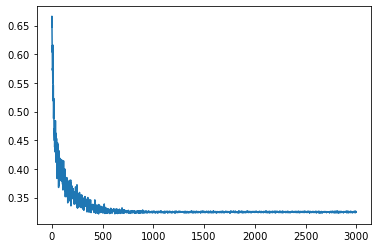

In [43]:
plt.plot(train_loss_list)